## Dataset cleanup

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Reading files
teams = pd.read_csv('seasons1-10/teams.csv')
players = pd.read_csv('seasons1-10/players.csv')
coaches = pd.read_csv('seasons1-10/coaches.csv')
awards_players = pd.read_csv('seasons1-10/awards_players.csv')
players_teams = pd.read_csv('seasons1-10/players_teams.csv')
teams_post = pd.read_csv('seasons1-10/teams_post.csv')
series_post = pd.read_csv('seasons1-10/series_post.csv')

teams11 = pd.read_csv('season11/teams.csv')
players_teams11 = pd.read_csv('season11/players_teams.csv')
coaches11 = pd.read_csv('season11/coaches.csv') 

In [3]:
NUM_SEASONS = 11

## Joining information of season 11 on previous data

In [4]:
db_11 = [teams11, players_teams11, coaches11]
db_1_10 = [teams, players_teams, coaches]

for idx in range(len(db_11)):
    # Performing a left join on common columns
    merged_df = pd.merge(db_11[idx], db_1_10[idx], on=list(db_11[idx].columns), how='left')

    # Finding columns present in df2 but not in df1
    additional_cols = [col for col in db_1_10[idx].columns if col not in db_11[idx].columns]

    # Filling missing values in the merged dataframe for additional columns with zeros
    merged_df[additional_cols] = merged_df[additional_cols].fillna(-1) #if replace with 0 the wasPresent won't get set properly

    db_1_10[idx] = pd.concat([db_1_10[idx], merged_df], ignore_index=True)

teams = db_1_10[0]
players_teams = db_1_10[1]
coaches = db_1_10[2]

### Cleaning up awards

In [5]:
awards_players.head()

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA


In [6]:
awards_players.drop('lgID', axis=1, inplace=True) # all play in wnba league
awards_players.groupby(['playerID', 'year', 'award'])['award']
awards_players.head(20)

,playerID,award,year
0,thompti01w,All-Star Game Most Valuable Player,1
1,leslili01w,All-Star Game Most Valuable Player,2
2,leslili01w,All-Star Game Most Valuable Player,3
3,teaslni01w,All-Star Game Most Valuable Player,4
4,swoopsh01w,All-Star Game Most Valuable Player,6
5,douglka01w,All-Star Game Most Valuable Player,7
6,fordch01w,All-Star Game Most Valuable Player,8
7,cashsw01w,All-Star Game Most Valuable Player,10
8,coopemi01w,Coach of the Year,1
9,hugheda99w,Coach of the Year,2


### Cleaning up players

In [7]:
players.head()

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00


In [8]:
# Dropping useless attributes
players.drop(['firstseason', 'lastseason'], axis=1, inplace=True) 

In [9]:
# Transforming the deathDate into binary feature called isAlive
players['deathDate'] = players['deathDate'].apply(lambda x: 'N' if x != '0000-00-00' else 'Y')
players = players.rename(columns={'deathDate': 'isAlive'})

Note: this refactor differs from what is the main.ipynb in the sense that I don't remove dead players
Maybe consider just dropping this attribute?

### Cleaning up players_teams

In [10]:
players_teams.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26.0,23.0,846.0,343.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abrossv01w,3,0,MIN,WNBA,27.0,27.0,805.0,314.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abrossv01w,4,0,MIN,WNBA,30.0,25.0,792.0,318.0,44.0,...,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0
3,abrossv01w,5,0,MIN,WNBA,22.0,11.0,462.0,146.0,17.0,...,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0
4,abrossv01w,6,0,MIN,WNBA,31.0,31.0,777.0,304.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Check the number of rows whose 'ligID' is different than 'WNBA'
players_teams[players_teams.lgID != 'WNBA'].shape[0]

0

In [12]:
# So we can simply drop 'lgID'
players_teams.drop('lgID', axis=1, inplace=True)

### Cleaning up coaches

In [13]:
coaches.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17.0,17.0,1.0,2.0
1,adubari99w,1,NYL,WNBA,0,20.0,12.0,4.0,3.0
2,adubari99w,2,NYL,WNBA,0,21.0,11.0,3.0,3.0
3,adubari99w,3,NYL,WNBA,0,18.0,14.0,4.0,4.0
4,adubari99w,4,NYL,WNBA,0,16.0,18.0,0.0,0.0


In [14]:
# Check the number of rows whose 'ligID' is different than 'WNBA'
coaches[coaches.lgID != 'WNBA'].shape[0]

0

In [15]:
# So we can simply drop 'lgID'
coaches.drop('lgID', axis=1, inplace=True)

### Cleaning up teams

In [16]:
teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7.0,N,0.0,NaN,...,34.0,1.0,16.0,3.0,14.0,2.0,18.0,6825.0,141379.0,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2.0,Y,0.0,L,...,34.0,12.0,5.0,6.0,11.0,10.0,12.0,6950.0,120737.0,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8.0,N,0.0,NaN,...,32.0,5.0,11.0,3.0,13.0,5.0,16.0,6475.0,90963.0,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4.0,Y,0.0,W,...,32.0,11.0,5.0,7.0,9.0,15.0,6.0,6500.0,105525.0,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2.0,Y,0.0,L,...,32.0,11.0,5.0,7.0,9.0,12.0,9.0,6450.0,106670.0,Charlotte Coliseum


In [17]:
# Check the number of rows whose 'ligID' is different than 'WNBA'
teams[teams.lgID != 'WNBA'].shape[0]

0

In [18]:
# So we can simply drop 'lgID'
teams.drop('lgID', axis=1, inplace=True)

In [19]:
# Check values of 'divID'
teams.divID.unique()

array([nan, -1.])

In [20]:
# All values of 'divID' are Nan, so we can simply drop it
teams.drop('divID', axis=1, inplace=True)

In [21]:
# Check values of 'seeded'
teams.seeded.unique()

array([ 0., -1.])

In [22]:
# All values of 'seeded' are 0, so we can simply drop it
teams.drop('seeded', axis=1, inplace=True)

In [23]:
# We don't believe that the 'arena' attribute is relevant, so we drop it
teams.drop('arena', axis=1, inplace=True)

In [24]:
# The team name also isn't relevant, we can just identify the team by its ID
teams.drop('name', axis=1, inplace=True)

In [25]:
# The min attribute is almost the same to every team
teams['min'].describe()
teams.drop('min', axis=1, inplace=True)

In [26]:
# Check the values of 'tmORB' tmDRB' tmTRB' 'opptmORB' opptmDRB' opptmTRB'
print(teams.tmORB.unique())
print(teams.tmDRB.unique())
print(teams.tmTRB.unique())
print(teams.opptmORB.unique())
print(teams.opptmDRB.unique())
print(teams.opptmTRB.unique())

[ 0. -1.]
[ 0. -1.]
[ 0. -1.]
[ 0. -1.]
[ 0. -1.]
[ 0. -1.]


In [27]:
# All of these attributes are always 0, se we can simply drop them
teams.drop(['tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'], axis=1, inplace=True)

## Attributing different values to awards won

In [28]:
# Showing different awards

# There was an award named Kim Perrot Sportsmanship, while all of the others were called Kim Perrot Sportsmanship Award, so the word "Award"
# was added to that instance
awards_players.loc[awards_players['award'] == 'Kim Perrot Sportsmanship', 'award'] = 'Kim Perrot Sportsmanship Award'

print(awards_players['award'].unique())

# 'All-Star Game Most Valuable Player' -> 10
# 'Coach of the Year' -> 5
# 'Defensive Player of the Year' -> 4 
# 'Kim Perrot Sportsmanship Award'-> 0 (the awrd is simply for athlethes who show sportmanship, maybe having them in the team
# makes the other players feel more uplifted, but it reveals no better playing techniques) 
# 'Most Improved Player' -> 2
# 'Most Valuable Player' -> 9
# 'Rookie of the Year' -> 1
# 'Sixth Woman of the Year' -> 3
# 'WNBA Finals Most Valuable Player' -> 7
# 'WNBA All-Decade Team' -> 8
# 'WNBA All Decade Team Honorable Mention'-> 6

['All-Star Game Most Valuable Player' 'Coach of the Year'
 'Defensive Player of the Year' 'Kim Perrot Sportsmanship Award'
 'Most Improved Player' 'Most Valuable Player' 'Rookie of the Year'
 'Sixth Woman of the Year' 'WNBA Finals Most Valuable Player'
 'WNBA All-Decade Team' 'WNBA All Decade Team Honorable Mention']


In [29]:
#Defining points for each award
#At this moment, all entries for the table are individual (for example, a player that may have won the award 2 times will have 2 entries)
awards_players.loc[awards_players['award'] == 'All-Star Game Most Valuable Player', 'awardPoints'] = 10
awards_players.loc[awards_players['award'] == 'Coach of the Year', 'awardPoints'] = 5
awards_players.loc[awards_players['award'] == 'Defensive Player of the Year', 'awardPoints'] = 4
awards_players.loc[awards_players['award'] == 'Kim Perrot Sportsmanship Award', 'awardPoints'] = 0
awards_players.loc[awards_players['award'] == 'Most Improved Player', 'awardPoints'] = 2
awards_players.loc[awards_players['award'] == 'Most Valuable Player', 'awardPoints'] = 9
awards_players.loc[awards_players['award'] == 'Rookie of the Year', 'awardPoints'] = 1
awards_players.loc[awards_players['award'] == 'Sixth Woman of the Year', 'awardPoints'] = 3
awards_players.loc[awards_players['award'] == 'WNBA Finals Most Valuable Player', 'awardPoints'] = 7
awards_players.loc[awards_players['award'] == 'WNBA All-Decade Team', 'awardPoints'] = 8
awards_players.loc[awards_players['award'] == 'WNBA All Decade Team Honorable Mention', 'awardPoints'] = 6


awards_players['playerID'] = awards_players['playerID'].astype(str)
awards_players = awards_players.sort_values(by='playerID')

# If you want to reset the index after sorting
awards_players.reset_index(drop=True, inplace=True)

# Print the sorted DataFrame
awards_players.head(20)

,playerID,award,year,awardPoints
0,arcaija01w,Most Improved Player,2,2.0
1,augusse01w,Rookie of the Year,7,1.0
2,beviltu01w,Kim Perrot Sportsmanship Award,8,0.0
3,birdsu01w,WNBA All-Decade Team,7,8.0
4,blackde01w,Defensive Player of the Year,2,4.0
5,boltoru01w,WNBA All Decade Team Honorable Mention,7,6.0
6,bonnede01w,Sixth Woman of the Year,10,3.0
7,campbed01w,Kim Perrot Sportsmanship Award,4,0.0
8,cashsw01w,All-Star Game Most Valuable Player,10,10.0
9,catchta01w,Rookie of the Year,3,1.0


In [30]:
# Adding unexistent pairs (tmID, year)
# Create a DataFrame with all combinations of 'tmID' and 'year' in the desired range
all_playerID = awards_players['playerID'].unique()
all_years = range(1, NUM_SEASONS + 1)
all_combinations = pd.MultiIndex.from_product([all_playerID, all_years], names=['playerID', 'year'])
all_playerID_years = pd.DataFrame(index=all_combinations).reset_index()

# Merge the original DataFrame with the newly created DataFrame
merged_df = pd.merge(all_playerID_years, awards_players, on=['playerID', 'year'], how='left')

# Fill missing values with 0 for numeric columns (except 'year' and 'tmID')
merged_df.update(merged_df.select_dtypes('number').fillna(0))

# Fill missing values for non-numeric columns with appropriate defaults
# For example, assuming 'playoff' and other columns are string columns:
merged_df.update(merged_df.select_dtypes(exclude='number'))

# Sort the DataFrame by 'tmID' and 'year' if needed
merged_df.sort_values(by=['playerID', 'year'], inplace=True)

# Now, merged_df contains rows for all 'tmID' and 'year' combinations from 1 to 10
# Missing numeric values are filled with 0, and missing non-numeric values are filled with 'NaN'

merged_df.head()

,playerID,year,award,awardPoints
0,arcaija01w,1,NaN,0.0
1,arcaija01w,2,Most Improved Player,2.0
2,arcaija01w,3,NaN,0.0
3,arcaija01w,4,NaN,0.0
4,arcaija01w,5,NaN,0.0


In [31]:
# The award should be more relevant the more recent it is
merged_df['awardPointsYear'] = merged_df['awardPoints']

In [32]:
# add pairs of (tmID, year) that do not existed before
# necessary for computing information based on previous years
#unique_pairs = awards_players.groupby(['playerID', 'confID']).size().reset_index().rename(columns={0: 'count'})

#merged_df['confID'].fillna(merged_df['playerID'].map(unique_pairs.set_index('playerID')['confID']), inplace=True)
#merged_df['wonAwards'].fillna('N', inplace=True)

merged_df['wonAwards'] = 'N'

# Print the updated DataFrame to verify the changes
print(merged_df)

       playerID  year                    award  awardPoints  awardPointsYear  \
0    arcaija01w     1                      NaN          0.0              0.0   
1    arcaija01w     2     Most Improved Player          2.0              2.0   
2    arcaija01w     3                      NaN          0.0              0.0   
3    arcaija01w     4                      NaN          0.0              0.0   
4    arcaija01w     5                      NaN          0.0              0.0   
..          ...   ...                      ...          ...              ...   
646  wiggica01w     7                      NaN          0.0              0.0   
647  wiggica01w     8                      NaN          0.0              0.0   
648  wiggica01w     9  Sixth Woman of the Year          3.0              3.0   
649  wiggica01w    10                      NaN          0.0              0.0   
650  wiggica01w    11                      NaN          0.0              0.0   

    wonAwards  
0           N  
1      

In [33]:
# Fill 'wonAwards' with 'Y' where 'award' is not NaN, and 'N' where 'award' is NaN
merged_df['wonAwards'] = np.where(pd.notna(merged_df['award']), 'Y', 'N')

# Print the updated DataFrame to verify the changes
print(merged_df)

       playerID  year                    award  awardPoints  awardPointsYear  \
0    arcaija01w     1                      NaN          0.0              0.0   
1    arcaija01w     2     Most Improved Player          2.0              2.0   
2    arcaija01w     3                      NaN          0.0              0.0   
3    arcaija01w     4                      NaN          0.0              0.0   
4    arcaija01w     5                      NaN          0.0              0.0   
..          ...   ...                      ...          ...              ...   
646  wiggica01w     7                      NaN          0.0              0.0   
647  wiggica01w     8                      NaN          0.0              0.0   
648  wiggica01w     9  Sixth Woman of the Year          3.0              3.0   
649  wiggica01w    10                      NaN          0.0              0.0   
650  wiggica01w    11                      NaN          0.0              0.0   

    wonAwards  
0           N  
1      

In [34]:
awards_players = merged_df.copy()

awards_players.head(20)

,playerID,year,award,awardPoints,awardPointsYear,wonAwards
0,arcaija01w,1,NaN,0.0,0.0,N
1,arcaija01w,2,Most Improved Player,2.0,2.0,Y
2,arcaija01w,3,NaN,0.0,0.0,N
3,arcaija01w,4,NaN,0.0,0.0,N
4,arcaija01w,5,NaN,0.0,0.0,N
5,arcaija01w,6,NaN,0.0,0.0,N
6,arcaija01w,7,NaN,0.0,0.0,N
7,arcaija01w,8,NaN,0.0,0.0,N
8,arcaija01w,9,NaN,0.0,0.0,N
9,arcaija01w,10,NaN,0.0,0.0,N


## Calculating overall score for each player each year

In [35]:
# Print every column
players_teams.columns.tolist()

['playerID',
 'year',
 'stint',
 'tmID',
 'GP',
 'GS',
 'minutes',
 'points',
 'oRebounds',
 'dRebounds',
 'rebounds',
 'assists',
 'steals',
 'blocks',
 'turnovers',
 'PF',
 'fgAttempted',
 'fgMade',
 'ftAttempted',
 'ftMade',
 'threeAttempted',
 'threeMade',
 'dq',
 'PostGP',
 'PostGS',
 'PostMinutes',
 'PostPoints',
 'PostoRebounds',
 'PostdRebounds',
 'PostRebounds',
 'PostAssists',
 'PostSteals',
 'PostBlocks',
 'PostTurnovers',
 'PostPF',
 'PostfgAttempted',
 'PostfgMade',
 'PostftAttempted',
 'PostftMade',
 'PostthreeAttempted',
 'PostthreeMade',
 'PostDQ']

In [36]:
players_teams = players_teams.sort_values(by='playerID', ascending=True)

# If you want to reset the index after sorting
#players_teams.reset_index(drop=True)
players_teams.head(10)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abrossv01w,3,0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abrossv01w,4,0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0
3,abrossv01w,5,0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0
4,abrossv01w,6,0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,abrossv01w,7,0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,abrossv01w,8,0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,abrossv01w,9,0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,0.0,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0
1876,adairje01w,11,0,MIN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1877,adamsda01w,11,0,SAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [37]:
# Adding unexistent pairs (tmID, year)
# Create a DataFrame with all combinations of 'tmID' and 'year' in the desired range
all_playerID = players_teams['playerID'].unique()
all_years = range(1, NUM_SEASONS + 1)
all_combinations = pd.MultiIndex.from_product([all_playerID, all_years], names=['playerID', 'year'])
all_playerID_years = pd.DataFrame(index=all_combinations).reset_index()

# Merge the original DataFrame with the newly created DataFrame
merged_df = pd.merge(all_playerID_years, players_teams, on=['playerID', 'year'], how='left')

# Fill missing values with 0 for numeric columns (except 'year' and 'tmID')
merged_df.update(merged_df.select_dtypes('number').fillna(0))

# Fill missing values for non-numeric columns with appropriate defaults
# For example, assuming 'playoff' and other columns are string columns:
merged_df.update(merged_df.select_dtypes(exclude='number'))

# Sort the DataFrame by 'tmID' and 'year' if needed
merged_df.sort_values(by=['playerID', 'year'], inplace=True)

# Now, merged_df contains rows for all 'tmID' and 'year' combinations from 1 to 10
# Missing numeric values are filled with 0, and missing non-numeric values are filled with 'NaN'

merged_df.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,0.0,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Formula used: Game Score = (Points + 0.4 × Field Goals Made - 0.7 × Field Goals Attempted - 0.4 × (Free Throws Attempted - Free Throws Made) + 0.7 × Offensive Rebounds + 0.3 × Defensive Rebounds + Steals + 0.7 × Assists + 0.7 × Blocks - 0.4 × Personal Fouls - Turnovers) / Minutes Played

In [38]:

# Define a custom function to perform the operation
def custom_operation(row):
    player_id = row['playerID']
    current_year = row['year']
    
    # If it's the first year, set the overallScoreYear to 0
    if current_year == 1:
        return 0
    
    # Find the data for the previous year
    previous_year_data = merged_df[(merged_df['playerID'] == player_id) & (merged_df['year'] == current_year - 1)]
    
    if not previous_year_data.empty:
        prev_year_row = previous_year_data.iloc[0]
        if prev_year_row['minutes'] != 0:
            return (prev_year_row['points'] + 0.4 * prev_year_row['fgMade'] - 
                    0.7 * prev_year_row['fgAttempted'] - 0.4 * (prev_year_row['ftAttempted'] - 
                    prev_year_row['ftMade']) + 0.7 * prev_year_row['oRebounds'] + 
                    0.3 * prev_year_row['dRebounds'] + prev_year_row['steals'] + 
                    0.7 * prev_year_row['assists'] + 0.7 * prev_year_row['blocks'] - 
                    0.4 * prev_year_row['PF'] - prev_year_row['turnovers']) / prev_year_row['minutes']
    
    return 0  # Set to 0 if no previous year data is available

# Apply the custom function to create the new column
merged_df['overallScoreYear'] = merged_df.apply(custom_operation, axis=1)

# Display the updated DataFrame
merged_df.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047


In [39]:

# add pairs of (tmID, year) that do not existed before
# necessary for computing information based on previous years
#unique_pairs = awards_players.groupby(['playerID', 'confID']).size().reset_index().rename(columns={0: 'count'})

#merged_df['confID'].fillna(merged_df['playerID'].map(unique_pairs.set_index('playerID')['confID']), inplace=True)
#merged_df['wonAwards'].fillna('N', inplace=True)

merged_df['playedThisYear'] = 'N'

# Print the updated DataFrame to verify the changes
merged_df.head(10)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,N
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,N
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,N
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,N
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,N
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,N
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,N
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,N
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,N
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N


In [40]:
# Fill 'wonAwards' with 'Y' where 'award' is not NaN, and 'N' where 'award' is NaN
merged_df['playedThisYear'] = np.where(pd.notna(merged_df['tmID']), 'Y', 'N')

# Print the updated DataFrame to verify the changes
merged_df.head(10)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,N
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Y
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,Y
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,Y
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,Y
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,Y
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N


In [41]:
merged_df_zeros = merged_df.copy()
merged_df_zeros.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,N
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Y
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,...,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,...,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,Y
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,Y
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,Y
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,...,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,Y
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N


In [42]:
# Calculate the first quartile (25th percentile) of overallScoreYear for each year, considering only players with minutes > 0
first_quartile_by_year = merged_df.query('overallScoreYear > 0').groupby('year')['overallScoreYear'].quantile(0.25).reset_index()
first_quartile_by_year.rename(columns={'overallScoreYear': 'first_quartile'}, inplace=True)

# Merge the first quartile values with the 'merged_df'
merged_df = merged_df.merge(first_quartile_by_year, on='year', how='left')

# Update the 'overallScoreYear' values where the initial value is 0 with the first quartile value
merged_df['overallScoreYear'] = np.where(merged_df['overallScoreYear'] == 0, merged_df['first_quartile'], merged_df['overallScoreYear'])

# Calculate the mean of first quartiles for all years except year 1
mean_first_quartile = first_quartile_by_year.query('year > 1')['first_quartile'].mean()

# Update the 'overallScoreYear' values for year 1 with the mean of first quartiles
merged_df.loc[merged_df['year'] == 1, 'overallScoreYear'] = mean_first_quartile

# Drop the added column 'first_quartile'
merged_df.drop(columns=['first_quartile'], inplace=True)

pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display as None
first_quartile_by_year.head(20)  # Display the first 25 rows with all columns

merged_df.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146695,N
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,174.0,53.0,42.0,9.0,85.0,70.0,293.0,114.0,132.0,96.0,76.0,19.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137229,Y
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,146.0,60.0,42.0,10.0,92.0,73.0,316.0,119.0,116.0,56.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,141.0,82.0,44.0,11.0,90.0,79.0,285.0,112.0,98.0,69.0,82.0,25.0,0.0,3.0,3.0,69.0,23.0,1.0,4.0,5.0,4.0,4.0,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,74.0,45.0,30.0,2.0,43.0,42.0,139.0,49.0,46.0,28.0,53.0,20.0,0.0,2.0,2.0,67.0,20.0,3.0,6.0,9.0,3.0,1.0,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,107.0,60.0,48.0,6.0,80.0,86.0,276.0,109.0,73.0,53.0,82.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,Y
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,106.0,54.0,34.0,1.0,61.0,66.0,241.0,99.0,62.0,41.0,65.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,Y
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,150.0,85.0,44.0,4.0,68.0,86.0,298.0,132.0,43.0,36.0,101.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,Y
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,20.0,12.0,8.0,0.0,11.0,13.0,36.0,11.0,12.0,10.0,12.0,2.0,0.0,3.0,2.0,63.0,24.0,3.0,8.0,11.0,4.0,4.0,0.0,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,Y
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N


In [43]:
players_teams = merged_df.copy()


players_teams.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146695,N
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,174.0,53.0,42.0,9.0,85.0,70.0,293.0,114.0,132.0,96.0,76.0,19.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137229,Y
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,146.0,60.0,42.0,10.0,92.0,73.0,316.0,119.0,116.0,56.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,141.0,82.0,44.0,11.0,90.0,79.0,285.0,112.0,98.0,69.0,82.0,25.0,0.0,3.0,3.0,69.0,23.0,1.0,4.0,5.0,4.0,4.0,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,74.0,45.0,30.0,2.0,43.0,42.0,139.0,49.0,46.0,28.0,53.0,20.0,0.0,2.0,2.0,67.0,20.0,3.0,6.0,9.0,3.0,1.0,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,107.0,60.0,48.0,6.0,80.0,86.0,276.0,109.0,73.0,53.0,82.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,Y
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,106.0,54.0,34.0,1.0,61.0,66.0,241.0,99.0,62.0,41.0,65.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,Y
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,150.0,85.0,44.0,4.0,68.0,86.0,298.0,132.0,43.0,36.0,101.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,Y
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,20.0,12.0,8.0,0.0,11.0,13.0,36.0,11.0,12.0,10.0,12.0,2.0,0.0,3.0,2.0,63.0,24.0,3.0,8.0,11.0,4.0,4.0,0.0,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,Y
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N


In [44]:
# Assuming you have two dataframes 'players_teams' and 'awards'

# Merge the 'awardPointsYear' from 'awards' into 'players_teams' based on 'playerID' and 'year'
players_teams = pd.merge(players_teams, awards_players[['playerID', 'year', 'awardPointsYear']], on=['playerID', 'year'], how='left')

players_teams['awardPointsYear'].fillna(0, inplace=True)
players_teams.head(20)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear,awardPointsYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146695,N,0.0
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,174.0,53.0,42.0,9.0,85.0,70.0,293.0,114.0,132.0,96.0,76.0,19.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137229,Y,0.0
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,146.0,60.0,42.0,10.0,92.0,73.0,316.0,119.0,116.0,56.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y,0.0
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,141.0,82.0,44.0,11.0,90.0,79.0,285.0,112.0,98.0,69.0,82.0,25.0,0.0,3.0,3.0,69.0,23.0,1.0,4.0,5.0,4.0,4.0,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y,0.0
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,74.0,45.0,30.0,2.0,43.0,42.0,139.0,49.0,46.0,28.0,53.0,20.0,0.0,2.0,2.0,67.0,20.0,3.0,6.0,9.0,3.0,1.0,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y,0.0
5,abrossv01w,6,0.0,MIN,31.0,31.0,777.0,304.0,29.0,78.0,107.0,60.0,48.0,6.0,80.0,86.0,276.0,109.0,73.0,53.0,82.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201732,Y,0.0
6,abrossv01w,7,0.0,MIN,34.0,2.0,724.0,263.0,44.0,62.0,106.0,54.0,34.0,1.0,61.0,66.0,241.0,99.0,62.0,41.0,65.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218662,Y,0.0
7,abrossv01w,8,0.0,MIN,34.0,29.0,843.0,345.0,53.0,97.0,150.0,85.0,44.0,4.0,68.0,86.0,298.0,132.0,43.0,36.0,101.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220994,Y,0.0
8,abrossv01w,9,0.0,CON,6.0,0.0,107.0,34.0,3.0,17.0,20.0,12.0,8.0,0.0,11.0,13.0,36.0,11.0,12.0,10.0,12.0,2.0,0.0,3.0,2.0,63.0,24.0,3.0,8.0,11.0,4.0,4.0,0.0,3.0,8.0,24.0,11.0,4.0,2.0,5.0,0.0,0.0,0.304270,Y,0.0
9,abrossv01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185047,N,0.0


In [45]:
#Checking that awardPointsYear is working, by searching for a player that actually won an award
desired_playerID = "arcaija01w"  # Replace "your_playerID" with the playerID you're looking for

# Create a boolean mask to filter rows with the specific playerID
mask = players_teams['playerID'] == desired_playerID

# Use the mask to filter rows in the DataFrame
result = players_teams[mask]

# Now, 'result' will contain all rows where 'playerID' matches the desired_playerID
result.head(10)

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear,awardPointsYear
199,arcaija01w,1,0.0,HOU,32.0,32.0,977.0,268.0,36.0,83.0,119.0,60.0,42.0,3.0,53.0,66.0,233.0,109.0,49.0,41.0,45.0,9.0,1.0,6.0,6.0,201.0,50.0,6.0,21.0,27.0,12.0,10.0,0.0,16.0,14.0,47.0,21.0,7.0,6.0,7.0,2.0,0.0,0.146695,Y,0.0
200,arcaija01w,2,0.0,HOU,32.0,32.0,1154.0,591.0,49.0,87.0,136.0,94.0,60.0,3.0,83.0,82.0,509.0,217.0,150.0,135.0,66.0,22.0,1.0,2.0,2.0,71.0,29.0,2.0,9.0,11.0,5.0,2.0,0.0,5.0,5.0,34.0,13.0,2.0,2.0,8.0,1.0,0.0,0.206858,Y,2.0
201,arcaija01w,3,0.0,HOU,32.0,32.0,1116.0,364.0,42.0,84.0,126.0,86.0,51.0,6.0,71.0,49.0,302.0,128.0,111.0,98.0,37.0,10.0,0.0,3.0,3.0,119.0,39.0,2.0,9.0,11.0,4.0,5.0,1.0,5.0,11.0,35.0,15.0,8.0,7.0,7.0,2.0,0.0,0.336222,Y,0.0
202,arcaija01w,4,0.0,HOU,34.0,34.0,1136.0,390.0,24.0,112.0,136.0,67.0,41.0,1.0,50.0,64.0,324.0,151.0,94.0,79.0,37.0,9.0,0.0,3.0,3.0,107.0,37.0,6.0,8.0,14.0,3.0,8.0,0.0,7.0,5.0,31.0,12.0,13.0,12.0,5.0,1.0,0.0,0.249104,Y,0.0
203,arcaija01w,5,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247359,N,0.0
204,arcaija01w,6,0.0,HOU,34.0,34.0,1079.0,342.0,20.0,73.0,93.0,53.0,55.0,6.0,56.0,85.0,304.0,128.0,94.0,83.0,16.0,3.0,0.0,5.0,5.0,138.0,44.0,1.0,9.0,10.0,6.0,6.0,0.0,2.0,5.0,33.0,16.0,12.0,12.0,1.0,0.0,0.0,0.127171,Y,0.0
205,arcaija01w,7,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202224,N,0.0
206,arcaija01w,8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160664,N,0.0
207,arcaija01w,9,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156195,N,0.0
208,arcaija01w,10,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146121,N,0.0


### Saving overall score information to the teams table

In [46]:
teams.head(20)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend
0,9,ATL,ATL,EA,7.0,N,NaN,NaN,NaN,895.0,2258.0,542.0,725.0,202.0,598.0,340.0,737.0,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,1014.0,2254.0,679.0,918.0,172.0,502.0,401.0,864.0,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,4.0,30.0,34.0,1.0,16.0,3.0,14.0,2.0,18.0,141379.0
1,10,ATL,ATL,EA,2.0,Y,L,NaN,NaN,1089.0,2428.0,569.0,755.0,114.0,374.0,404.0,855.0,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,996.0,2363.0,624.0,807.0,181.0,530.0,353.0,821.0,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,18.0,16.0,34.0,12.0,5.0,6.0,11.0,10.0,12.0,120737.0
2,1,CHA,CHA,EA,8.0,N,NaN,NaN,NaN,812.0,1903.0,431.0,577.0,131.0,386.0,305.0,630.0,935.0,551.0,713.0,222.0,496.0,90.0,2186.0,879.0,1930.0,533.0,716.0,138.0,423.0,326.0,664.0,990.0,596.0,596.0,259.0,426.0,123.0,2429.0,8.0,24.0,32.0,5.0,11.0,3.0,13.0,5.0,16.0,90963.0
3,2,CHA,CHA,EA,4.0,Y,W,W,L,746.0,1780.0,410.0,528.0,153.0,428.0,309.0,639.0,948.0,467.0,605.0,217.0,474.0,114.0,2055.0,732.0,1846.0,431.0,562.0,114.0,369.0,344.0,567.0,911.0,443.0,579.0,257.0,447.0,124.0,2009.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,15.0,6.0,105525.0
4,3,CHA,CHA,EA,2.0,Y,L,NaN,NaN,770.0,1790.0,490.0,663.0,211.0,527.0,302.0,653.0,955.0,496.0,647.0,241.0,408.0,105.0,2241.0,778.0,1807.0,444.0,598.0,133.0,372.0,295.0,620.0,915.0,489.0,600.0,208.0,424.0,103.0,2133.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,12.0,9.0,106670.0
5,4,CHA,CHA,EA,2.0,Y,L,NaN,NaN,787.0,1881.0,456.0,590.0,187.0,517.0,342.0,629.0,971.0,499.0,697.0,279.0,497.0,115.0,2217.0,790.0,1902.0,477.0,667.0,138.0,407.0,386.0,621.0,1007.0,491.0,606.0,264.0,469.0,104.0,2195.0,18.0,16.0,34.0,13.0,4.0,5.0,12.0,12.0,12.0,120061.0
6,5,CHA,CHA,EA,5.0,N,NaN,NaN,NaN,745.0,1744.0,436.0,590.0,166.0,459.0,256.0,616.0,872.0,426.0,648.0,210.0,479.0,134.0,2092.0,800.0,1932.0,438.0,587.0,130.0,349.0,368.0,628.0,996.0,516.0,595.0,243.0,437.0,114.0,2168.0,16.0,18.0,34.0,10.0,7.0,6.0,11.0,8.0,12.0,116383.0
7,6,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,772.0,1913.0,447.0,624.0,104.0,301.0,316.0,609.0,925.0,493.0,727.0,284.0,535.0,113.0,2095.0,851.0,1888.0,509.0,713.0,124.0,339.0,355.0,700.0,1055.0,496.0,654.0,269.0,534.0,146.0,2335.0,6.0,28.0,34.0,5.0,12.0,1.0,16.0,4.0,16.0,98054.0
8,7,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,864.0,2178.0,552.0,777.0,176.0,544.0,347.0,747.0,1094.0,527.0,734.0,315.0,574.0,155.0,2456.0,911.0,2149.0,594.0,791.0,155.0,465.0,370.0,870.0,1240.0,522.0,707.0,286.0,619.0,125.0,2571.0,11.0,23.0,34.0,7.0,10.0,4.0,13.0,6.0,14.0,106942.0
9,7,CHI,CHI,EA,7.0,N,NaN,NaN,NaN,858.0,2175.0,449.0,643.0,157.0,536.0,357.0,680.0,1037.0,509.0,674.0,277.0,527.0,125.0,2322.0,971.0,2147.0,545.0,736.0,200.0,536.0,379.0,860.0,1239.0,623.0,584.0,262.0,535.0,120.0,2687.0,5.0,29.0,34.0,3.0,14.0,2.0,15.0,4.0,16.0,57635.0


In [47]:
# Step 1: Group players_teams by 'tmID' and 'year' and calculate the mean of 'awardPointsYear'
mean_award_points = players_teams.groupby(['tmID', 'year'])['awardPointsYear'].mean().reset_index()

# Step 2: Merge mean_award_points with teams on 'tmID' and 'year'
merged_df = pd.merge(teams, mean_award_points, on=['tmID', 'year'], how='left')

# Step 3: Rename the 'awardPointsYear' column to 'teamYearAwardPoints' and fill missing values with 0
merged_df.rename(columns={'awardPointsYear': 'teamYearAwardPoints'}, inplace=True)
merged_df['teamYearAwardPoints'].fillna(0, inplace=True)

# Update the 'teams' DataFrame with the 'teamYearAwardPoints' column
teams['teamYearAwardPoints'] = merged_df['teamYearAwardPoints']

# Display the updated 'teams' DataFrame
teams.head(20)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints
0,9,ATL,ATL,EA,7.0,N,NaN,NaN,NaN,895.0,2258.0,542.0,725.0,202.0,598.0,340.0,737.0,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,1014.0,2254.0,679.0,918.0,172.0,502.0,401.0,864.0,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,4.0,30.0,34.0,1.0,16.0,3.0,14.0,2.0,18.0,141379.0,0.000000
1,10,ATL,ATL,EA,2.0,Y,L,NaN,NaN,1089.0,2428.0,569.0,755.0,114.0,374.0,404.0,855.0,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,996.0,2363.0,624.0,807.0,181.0,530.0,353.0,821.0,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,18.0,16.0,34.0,12.0,5.0,6.0,11.0,10.0,12.0,120737.0,0.076923
2,1,CHA,CHA,EA,8.0,N,NaN,NaN,NaN,812.0,1903.0,431.0,577.0,131.0,386.0,305.0,630.0,935.0,551.0,713.0,222.0,496.0,90.0,2186.0,879.0,1930.0,533.0,716.0,138.0,423.0,326.0,664.0,990.0,596.0,596.0,259.0,426.0,123.0,2429.0,8.0,24.0,32.0,5.0,11.0,3.0,13.0,5.0,16.0,90963.0,0.000000
3,2,CHA,CHA,EA,4.0,Y,W,W,L,746.0,1780.0,410.0,528.0,153.0,428.0,309.0,639.0,948.0,467.0,605.0,217.0,474.0,114.0,2055.0,732.0,1846.0,431.0,562.0,114.0,369.0,344.0,567.0,911.0,443.0,579.0,257.0,447.0,124.0,2009.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,15.0,6.0,105525.0,0.000000
4,3,CHA,CHA,EA,2.0,Y,L,NaN,NaN,770.0,1790.0,490.0,663.0,211.0,527.0,302.0,653.0,955.0,496.0,647.0,241.0,408.0,105.0,2241.0,778.0,1807.0,444.0,598.0,133.0,372.0,295.0,620.0,915.0,489.0,600.0,208.0,424.0,103.0,2133.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,12.0,9.0,106670.0,0.000000
5,4,CHA,CHA,EA,2.0,Y,L,NaN,NaN,787.0,1881.0,456.0,590.0,187.0,517.0,342.0,629.0,971.0,499.0,697.0,279.0,497.0,115.0,2217.0,790.0,1902.0,477.0,667.0,138.0,407.0,386.0,621.0,1007.0,491.0,606.0,264.0,469.0,104.0,2195.0,18.0,16.0,34.0,13.0,4.0,5.0,12.0,12.0,12.0,120061.0,0.000000
6,5,CHA,CHA,EA,5.0,N,NaN,NaN,NaN,745.0,1744.0,436.0,590.0,166.0,459.0,256.0,616.0,872.0,426.0,648.0,210.0,479.0,134.0,2092.0,800.0,1932.0,438.0,587.0,130.0,349.0,368.0,628.0,996.0,516.0,595.0,243.0,437.0,114.0,2168.0,16.0,18.0,34.0,10.0,7.0,6.0,11.0,8.0,12.0,116383.0,0.000000
7,6,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,772.0,1913.0,447.0,624.0,104.0,301.0,316.0,609.0,925.0,493.0,727.0,284.0,535.0,113.0,2095.0,851.0,1888.0,509.0,713.0,124.0,339.0,355.0,700.0,1055.0,496.0,654.0,269.0,534.0,146.0,2335.0,6.0,28.0,34.0,5.0,12.0,1.0,16.0,4.0,16.0,98054.0,0.000000
8,7,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,864.0,2178.0,552.0,777.0,176.0,544.0,347.0,747.0,1094.0,527.0,734.0,315.0,574.0,155.0,2456.0,911.0,2149.0,594.0,791.0,155.0,465.0,370.0,870.0,1240.0,522.0,707.0,286.0,619.0,125.0,2571.0,11.0,23.0,34.0,7.0,10.0,4.0,13.0,6.0,14.0,106942.0,0.000000
9,7,CHI,CHI,EA,7.0,N,NaN,NaN,NaN,858.0,2175.0,449.0,643.0,157.0,536.0,357.0,680.0,1037.0,509.0,674.0,277.0,527.0,125.0,2322.0,971.0,2147.0,545.0,736.0,200.0,536.0,379.0,860.0,1239.0,623.0,584.0,262.0,535.0,120.0,2687.0,5.0,29.0,34.0,3.0,14.0,2.0,15.0,4.0,16.0,57635.0,0.000000


In [48]:
# Step 1: Group players_teams by 'tmID' and 'year' and sum 'overallYearScore'
sum_overall_score = players_teams.groupby(['tmID', 'year'])['overallScoreYear'].mean().reset_index()

# Step 2: Merge sum_overall_score with teams on 'tmID' and 'year'
merged_df = pd.merge(teams, sum_overall_score, on=['tmID', 'year'], how='left')

# Step 3: Rename the 'overallYearScore' column and fill missing values with 0
merged_df.rename(columns={'overallScoreYear': 'teamYearOverallScore'}, inplace=True)
merged_df['teamYearOverallScore'].fillna(0, inplace=True)

# Update the 'teams' DataFrame with the 'teamYearOverallScore' column
teams['teamYearOverallScore'] = merged_df['teamYearOverallScore']

# Display the updated 'teams' DataFrame
teams.head(20)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
0,9,ATL,ATL,EA,7.0,N,NaN,NaN,NaN,895.0,2258.0,542.0,725.0,202.0,598.0,340.0,737.0,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,1014.0,2254.0,679.0,918.0,172.0,502.0,401.0,864.0,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,4.0,30.0,34.0,1.0,16.0,3.0,14.0,2.0,18.0,141379.0,0.000000,0.176538
1,10,ATL,ATL,EA,2.0,Y,L,NaN,NaN,1089.0,2428.0,569.0,755.0,114.0,374.0,404.0,855.0,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,996.0,2363.0,624.0,807.0,181.0,530.0,353.0,821.0,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,18.0,16.0,34.0,12.0,5.0,6.0,11.0,10.0,12.0,120737.0,0.076923,0.219682
2,1,CHA,CHA,EA,8.0,N,NaN,NaN,NaN,812.0,1903.0,431.0,577.0,131.0,386.0,305.0,630.0,935.0,551.0,713.0,222.0,496.0,90.0,2186.0,879.0,1930.0,533.0,716.0,138.0,423.0,326.0,664.0,990.0,596.0,596.0,259.0,426.0,123.0,2429.0,8.0,24.0,32.0,5.0,11.0,3.0,13.0,5.0,16.0,90963.0,0.000000,0.146695
3,2,CHA,CHA,EA,4.0,Y,W,W,L,746.0,1780.0,410.0,528.0,153.0,428.0,309.0,639.0,948.0,467.0,605.0,217.0,474.0,114.0,2055.0,732.0,1846.0,431.0,562.0,114.0,369.0,344.0,567.0,911.0,443.0,579.0,257.0,447.0,124.0,2009.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,15.0,6.0,105525.0,0.000000,0.200753
4,3,CHA,CHA,EA,2.0,Y,L,NaN,NaN,770.0,1790.0,490.0,663.0,211.0,527.0,302.0,653.0,955.0,496.0,647.0,241.0,408.0,105.0,2241.0,778.0,1807.0,444.0,598.0,133.0,372.0,295.0,620.0,915.0,489.0,600.0,208.0,424.0,103.0,2133.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,12.0,9.0,106670.0,0.000000,0.178497
5,4,CHA,CHA,EA,2.0,Y,L,NaN,NaN,787.0,1881.0,456.0,590.0,187.0,517.0,342.0,629.0,971.0,499.0,697.0,279.0,497.0,115.0,2217.0,790.0,1902.0,477.0,667.0,138.0,407.0,386.0,621.0,1007.0,491.0,606.0,264.0,469.0,104.0,2195.0,18.0,16.0,34.0,13.0,4.0,5.0,12.0,12.0,12.0,120061.0,0.000000,0.223440
6,5,CHA,CHA,EA,5.0,N,NaN,NaN,NaN,745.0,1744.0,436.0,590.0,166.0,459.0,256.0,616.0,872.0,426.0,648.0,210.0,479.0,134.0,2092.0,800.0,1932.0,438.0,587.0,130.0,349.0,368.0,628.0,996.0,516.0,595.0,243.0,437.0,114.0,2168.0,16.0,18.0,34.0,10.0,7.0,6.0,11.0,8.0,12.0,116383.0,0.000000,0.176760
7,6,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,772.0,1913.0,447.0,624.0,104.0,301.0,316.0,609.0,925.0,493.0,727.0,284.0,535.0,113.0,2095.0,851.0,1888.0,509.0,713.0,124.0,339.0,355.0,700.0,1055.0,496.0,654.0,269.0,534.0,146.0,2335.0,6.0,28.0,34.0,5.0,12.0,1.0,16.0,4.0,16.0,98054.0,0.000000,0.181713
8,7,CHA,CHA,EA,6.0,N,NaN,NaN,NaN,864.0,2178.0,552.0,777.0,176.0,544.0,347.0,747.0,1094.0,527.0,734.0,315.0,574.0,155.0,2456.0,911.0,2149.0,594.0,791.0,155.0,465.0,370.0,870.0,1240.0,522.0,707.0,286.0,619.0,125.0,2571.0,11.0,23.0,34.0,7.0,10.0,4.0,13.0,6.0,14.0,106942.0,0.000000,0.156753
9,7,CHI,CHI,EA,7.0,N,NaN,NaN,NaN,858.0,2175.0,449.0,643.0,157.0,536.0,357.0,680.0,1037.0,509.0,674.0,277.0,527.0,125.0,2322.0,971.0,2147.0,545.0,736.0,200.0,536.0,379.0,860.0,1239.0,623.0,584.0,262.0,535.0,120.0,2687.0,5.0,29.0,34.0,3.0,14.0,2.0,15.0,4.0,16.0,57635.0,0.000000,0.149569


## Removing players that never played in any team

In [49]:
# Filter players based on bioID presence in players_teams
filtered_players = players[players['bioID'].isin(players_teams['playerID'])]

In [50]:
print("Previous number of player rows:", players.bioID.count())
print("New number of player rows:", filtered_players.bioID.count())
print(players.bioID.count() - filtered_players.bioID.count(), "ghost players where removed")
players = filtered_players

Previous number of player rows: 893
New number of player rows: 597
296 ghost players where removed


## Dealing with missing height and weight information

We detected the presence of players whose height or weight is 0 or other unreasonable value, but otherwise their stats look normal. Therefore we estimate their weight based on their height or vice-versa.

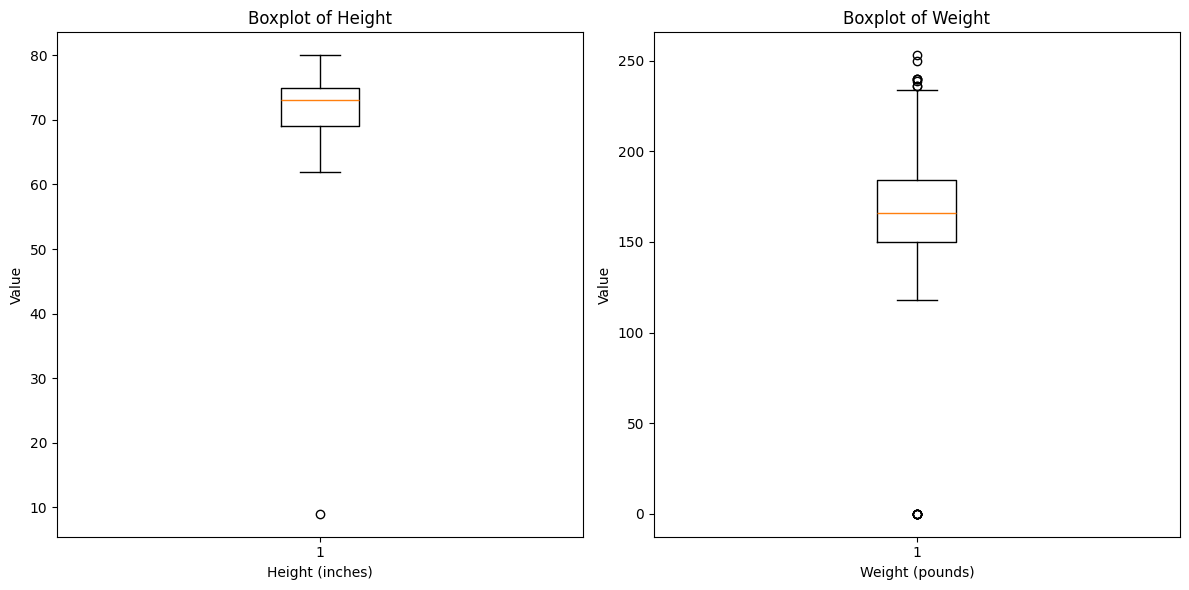

In [51]:
# Identify outliers

# Create separate box plots for height and weight
plt.figure(figsize=(12, 6))

# Box plot for height
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.boxplot(players['height'])
plt.xlabel('Height (inches)')
plt.ylabel('Value')
plt.title('Boxplot of Height')

# Box plot for weight
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.boxplot(players['weight'])
plt.xlabel('Weight (pounds)')
plt.ylabel('Value')
plt.title('Boxplot of Weight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [52]:
# Find players whose weight or height is unreasonable
players[(players.weight < 100) | (players.weight > 260) | (players.height < 55) | (players.height > 85)][['height', 'weight']]

,height,weight
33,75.0,0
56,76.0,0
203,71.0,0
225,9.0,223
286,70.0,0
370,74.0,0
521,76.0,0
682,74.0,0
719,72.0,0


In [53]:
# Filter out players that don't have a reasonable height and weight stat
players_with_height_and_weight = players[~((players.weight < 100) | (players.weight > 255) | (players.height < 55) | (players.height > 85))]

# Calculate the average BMI of the players
bmi = 703 * (players_with_height_and_weight['weight'] / ((players_with_height_and_weight['height'])**2)).mean()

In [54]:
# Estimate weights for players with weight == 0
estimated_weights = bmi * (players[players.weight == 0].height**2 / 703)

# Update the 'bmi' column for the corresponding rows in the 'players' DataFrame
players.loc[players.weight == 0, 'weight'] = estimated_weights

/var/folders/5q/z4hwwtk50yngsdv9lm9d3nmm0000gn/T/ipykernel_58815/36095402.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[181.91251867 186.79585917 163.02595673 158.46601626 177.09385817
 186.79585917 177.09385817 167.65057721]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players.loc[players.weight == 0, 'weight'] = estimated_weights


In [55]:
players.weight.describe()

count    597.000000
mean     168.658014
std       23.495066
min      118.000000
25%      150.000000
50%      167.000000
75%      185.000000
max      253.000000
Name: weight, dtype: float64

In [56]:
# Deal with the player with height 9.0
players.at[225, 'height'] = round((players.at[225, 'weight'] / bmi * 703) ** 0.5)

In [57]:
# Find players whose weight or height is unreasonable
players[(players.weight < 100) | (players.weight > 255) | (players.height < 5) | (players.height > 85)][['height', 'weight']]

,height,weight


## Finding and dealing with correlations between features

### Correlations in teams

In [58]:
#corr_spearman = teams['tmID'].corr(teams['franchID'], method='spearman')
#corr_kendall = teams['tmID'].corr(teams['franchID'], method='kendall')

#(corr_spearman, corr_kendall)

In [59]:
# 'francID' is very closely correlated to 'tmID', so we drop it
teams.drop('franchID', axis=1, inplace=True)

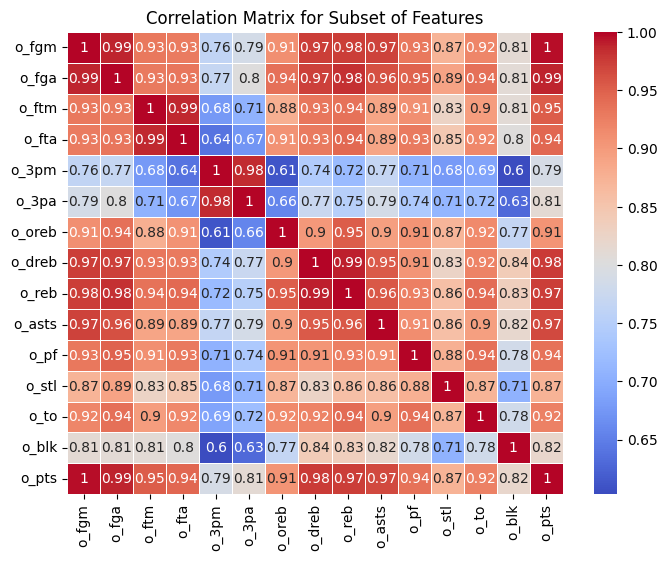

In [60]:
# Select a subset of features
subset_features = ['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa',
       'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk',
       'o_pts']

# Calculate the correlation matrix for the subset of features
subset_corr_matrix = teams[subset_features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Subset of Features')
plt.show()

In [61]:
teams[teams.o_oreb + teams.o_dreb != teams.o_reb] # conclusion: orebs + drebs = rebs
teams[teams.d_oreb + teams.d_dreb != teams.d_reb] # conclusion: orebs + drebs = rebs

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
142,11,ATL,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.251448
143,11,CHI,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.233014
144,11,CON,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.219179
145,11,IND,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.267966
146,11,LAS,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.237267
147,11,MIN,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.289528
148,11,NYL,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.215965
149,11,PHO,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.282195
150,11,SAS,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.261839
151,11,SEA,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.216977


In [62]:
teams[['o_oreb', 'd_oreb','d_dreb','o_dreb']].head()

,o_oreb,d_oreb,d_dreb,o_dreb
0,340.0,401.0,864.0,737.0
1,404.0,353.0,821.0,855.0
2,305.0,326.0,664.0,630.0
3,309.0,344.0,567.0,639.0
4,302.0,295.0,620.0,653.0


In [63]:
corr_spearman = teams['o_pts'].corr(teams['d_pts'], method='spearman')
corr_kendall = teams['o_pts'].corr(teams['d_pts'], method='kendall')

(corr_spearman, corr_kendall)

(0.8701629466018218, 0.6981333618467102)

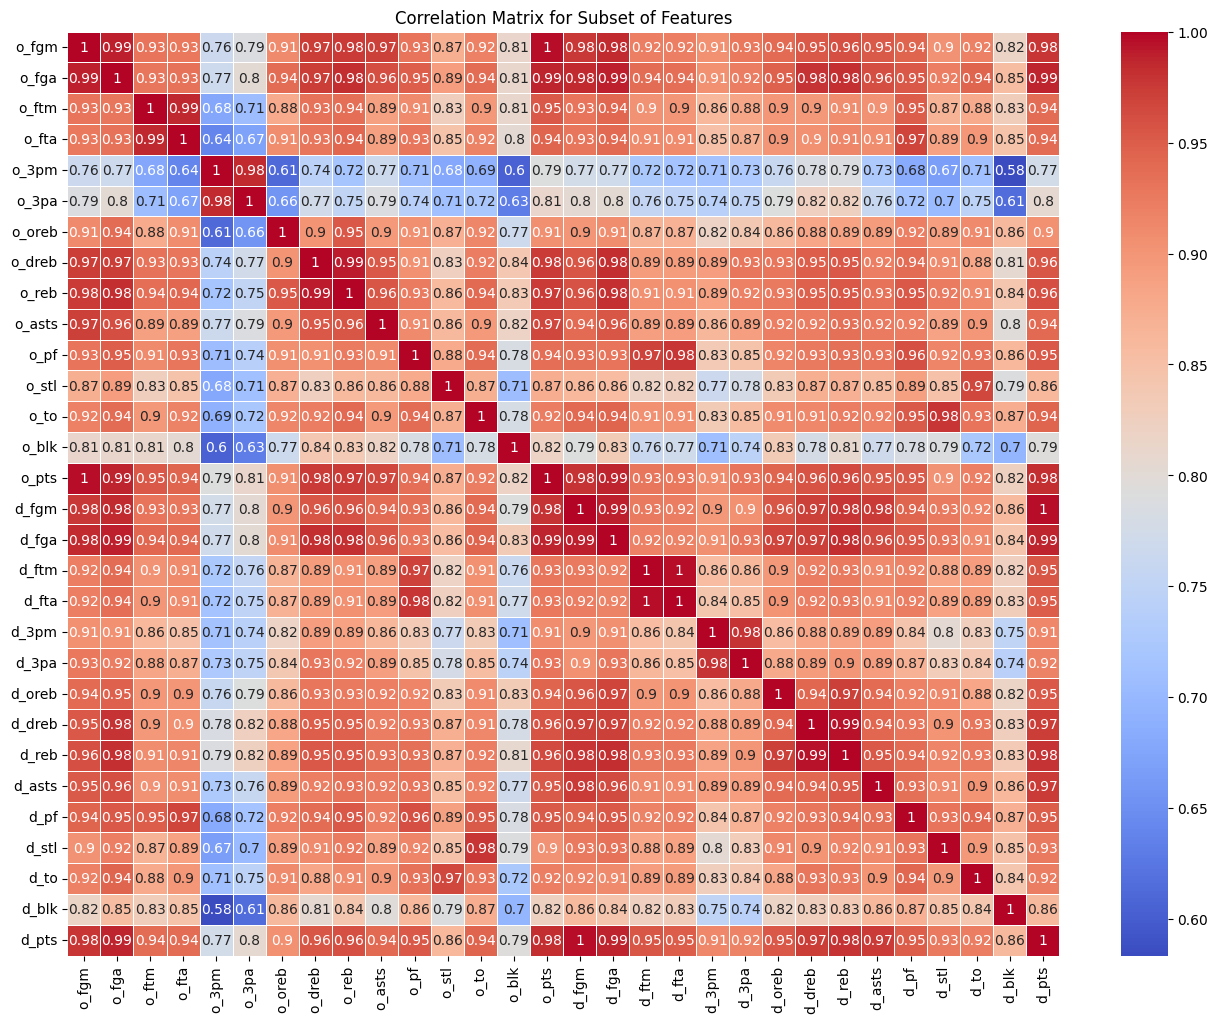

In [64]:
# Select a subset of features
subset_features = ['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa',
       'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk',
       'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb',
       'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts']

# Calculate the correlation matrix for the subset of features
subset_corr_matrix = teams[subset_features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Subset of Features')
plt.show()

In [65]:
# Correlation between points and distribution of ft 3pm and 2fgm 
teams[teams.o_pts != teams.o_ftm + 3 * teams.o_3pm + (teams.o_fgm - teams.o_3pm) * 2]
teams[teams.d_pts != teams.d_ftm + 3 * teams.d_3pm + (teams.d_fgm - teams.d_3pm) * 2]

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
142,11,ATL,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.251448
143,11,CHI,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.233014
144,11,CON,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.219179
145,11,IND,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.267966
146,11,LAS,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.237267
147,11,MIN,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.289528
148,11,NYL,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.215965
149,11,PHO,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.282195
150,11,SAS,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.261839
151,11,SEA,WE,-1.0,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.216977


In [66]:
# before deleting all the features that are a part of o_pts and d_pts let's compute the accuracy of ft, 3pm and 2fgm

teams['o_fta'] = teams['o_ftm'] / teams['o_fta']
teams['d_fta'] = teams['d_ftm'] / teams['d_fta']

teams['o_3pa'] = teams['o_3pm'] / teams['o_3pa']
teams['d_3pa'] = teams['d_3pm'] / teams['d_3pa']

teams['o_fga'] = teams['o_fgm'] / teams['o_fga']
teams['d_fga'] = teams['d_fgm'] / teams['d_fga']

# note: from now on the 'a' in fga, 3pa and fga stands for *accuracy* instead of *attempted* and the value is a % -> between 0-1^

In [67]:
teams[['o_fta','o_3pa', 'o_fga']].head()

,o_fta,o_3pa,o_fga
0,0.747586,0.337793,0.396368
1,0.753642,0.304813,0.448517
2,0.746967,0.339378,0.426695
3,0.776515,0.357477,0.419101
4,0.739065,0.400380,0.430168


In [68]:
teams.drop(['o_ftm','o_3pm','o_fgm','d_ftm','d_3pm','d_fgm'], axis=1, inplace=True) # o_pts and d_pts are enough

teams.drop(['o_oreb', 'o_dreb'], axis=1, inplace=True)  # o_reb and d_reb are enough
teams.drop(['d_oreb', 'd_dreb'], axis=1, inplace=True)

In [69]:
teams.head()

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
0,9,ATL,EA,7.0,N,NaN,NaN,NaN,0.396368,0.747586,0.337793,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,0.449867,0.739651,0.342629,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,4.0,30.0,34.0,1.0,16.0,3.0,14.0,2.0,18.0,141379.0,0.000000,0.176538
1,10,ATL,EA,2.0,Y,L,NaN,NaN,0.448517,0.753642,0.304813,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,0.421498,0.773234,0.341509,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,18.0,16.0,34.0,12.0,5.0,6.0,11.0,10.0,12.0,120737.0,0.076923,0.219682
2,1,CHA,EA,8.0,N,NaN,NaN,NaN,0.426695,0.746967,0.339378,935.0,551.0,713.0,222.0,496.0,90.0,2186.0,0.455440,0.744413,0.326241,990.0,596.0,596.0,259.0,426.0,123.0,2429.0,8.0,24.0,32.0,5.0,11.0,3.0,13.0,5.0,16.0,90963.0,0.000000,0.146695
3,2,CHA,EA,4.0,Y,W,W,L,0.419101,0.776515,0.357477,948.0,467.0,605.0,217.0,474.0,114.0,2055.0,0.396533,0.766904,0.308943,911.0,443.0,579.0,257.0,447.0,124.0,2009.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,15.0,6.0,105525.0,0.000000,0.200753
4,3,CHA,EA,2.0,Y,L,NaN,NaN,0.430168,0.739065,0.400380,955.0,496.0,647.0,241.0,408.0,105.0,2241.0,0.430548,0.742475,0.357527,915.0,489.0,600.0,208.0,424.0,103.0,2133.0,18.0,14.0,32.0,11.0,5.0,7.0,9.0,12.0,9.0,106670.0,0.000000,0.178497


In [70]:
teams[teams.won != teams.homeW + teams.awayW]
teams[teams.lost != teams.homeL + teams.awayL]

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
142,11,ATL,EA,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.251448
143,11,CHI,EA,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.233014
144,11,CON,EA,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.219179
145,11,IND,EA,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.267966
146,11,LAS,WE,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.237267
147,11,MIN,WE,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.289528
148,11,NYL,EA,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.215965
149,11,PHO,WE,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.282195
150,11,SAS,WE,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.261839
151,11,SEA,WE,-1.0,-1,-1,-1,-1,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.216977


In [71]:
teams.drop(['homeW', 'homeL', 'awayW', 'awayL'], axis=1, inplace=True)

In [72]:
teams['GP'] = teams['won'] / teams['GP']

In [73]:
teams.rename(columns={'GP': 'winRatio'}, inplace=True)

In [74]:
teams['winRatio'].head()

0    0.117647
1    0.529412
2    0.250000
3    0.562500
4    0.562500
Name: winRatio, dtype: float64

In [75]:
teams.drop(['won', 'lost'], axis=1, inplace=True)

### Correlations in players_teams

In [76]:
players_teams.head()

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear,awardPointsYear
0,abrossv01w,1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146695,N,0.0
1,abrossv01w,2,0.0,MIN,26.0,23.0,846.0,343.0,43.0,131.0,174.0,53.0,42.0,9.0,85.0,70.0,293.0,114.0,132.0,96.0,76.0,19.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137229,Y,0.0
2,abrossv01w,3,0.0,MIN,27.0,27.0,805.0,314.0,45.0,101.0,146.0,60.0,42.0,10.0,92.0,73.0,316.0,119.0,116.0,56.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249291,Y,0.0
3,abrossv01w,4,0.0,MIN,30.0,25.0,792.0,318.0,44.0,97.0,141.0,82.0,44.0,11.0,90.0,79.0,285.0,112.0,98.0,69.0,82.0,25.0,0.0,3.0,3.0,69.0,23.0,1.0,4.0,5.0,4.0,4.0,1.0,8.0,8.0,22.0,6.0,8.0,8.0,7.0,3.0,0.0,0.183851,Y,0.0
4,abrossv01w,5,0.0,MIN,22.0,11.0,462.0,146.0,17.0,57.0,74.0,45.0,30.0,2.0,43.0,42.0,139.0,49.0,46.0,28.0,53.0,20.0,0.0,2.0,2.0,67.0,20.0,3.0,6.0,9.0,3.0,1.0,2.0,3.0,7.0,23.0,8.0,4.0,2.0,8.0,2.0,0.0,0.251389,Y,0.0


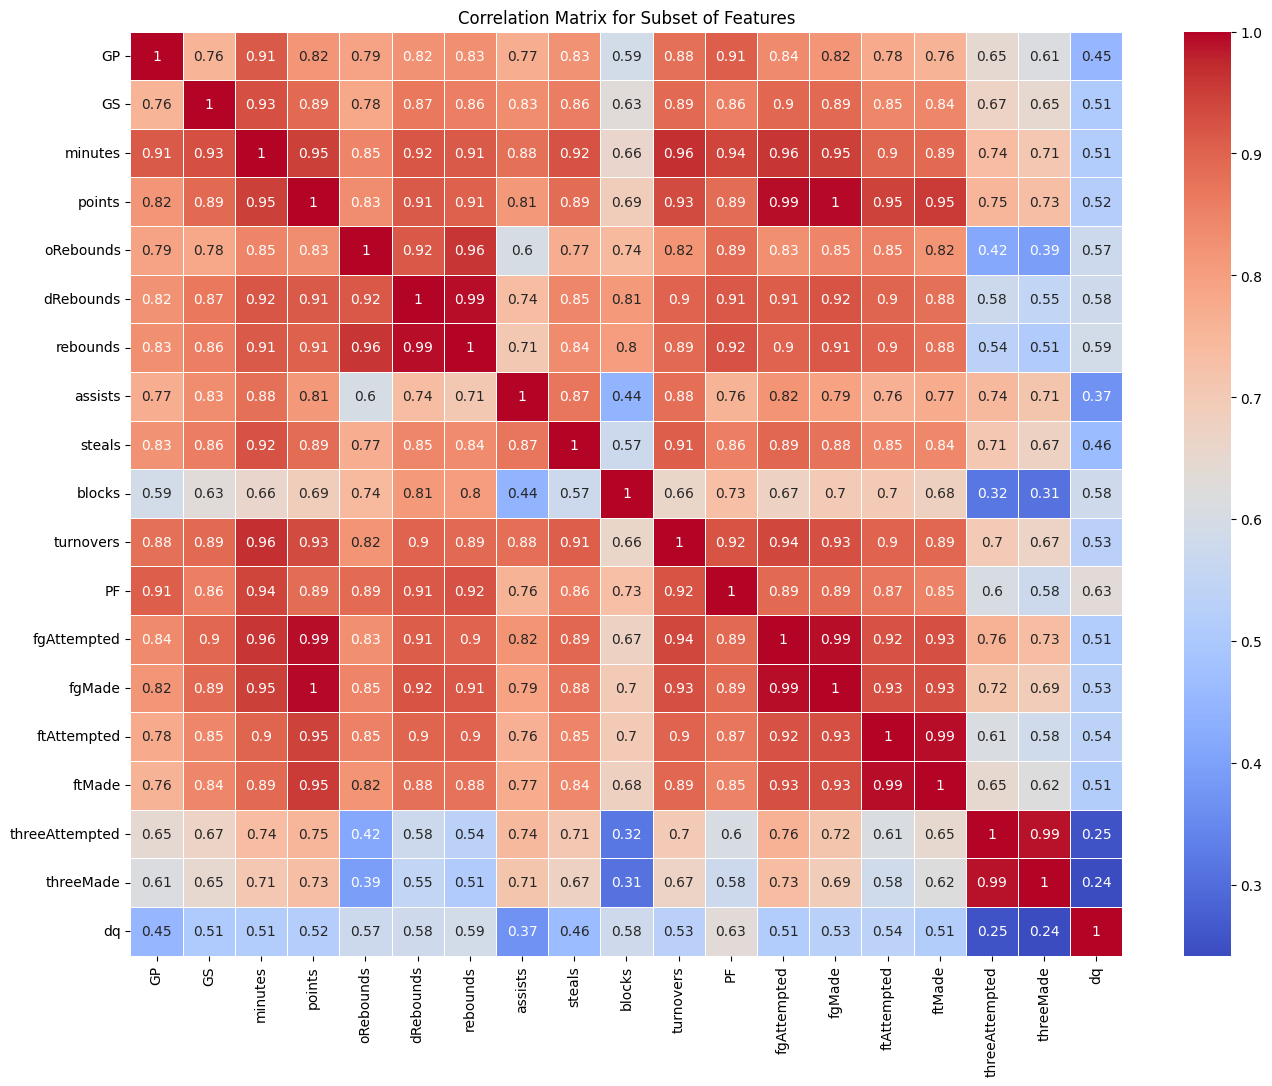

In [77]:
# Select a subset of features
subset_features = ['GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'dq']

# Calculate the correlation matrix for the subset of features
subset_corr_matrix = players_teams[subset_features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Subset of Features')
plt.show()

In [78]:
# High correlation between points and fgAttempted and fgMade
players_teams.drop(['fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted','threeMade'], axis=1, inplace=True)

In [79]:
players_teams[players_teams['oRebounds'] + players_teams.dRebounds != players_teams.rebounds]

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,dq,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ,overallScoreYear,playedThisYear,awardPointsYear
21,adairje01w,11,0.0,MIN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.187688,Y,0.0
32,adamsda01w,11,0.0,SAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.187688,Y,0.0
65,ajavoma01w,11,0.0,WAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.215673,Y,0.0
187,anosini01w,11,0.0,WAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.441741,Y,0.0
198,appelja01w,11,0.0,SAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.187688,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,wrighmo01w,11,0.0,MIN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.187688,Y,0.0
6523,wrighta01w,11,0.0,SEA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.280410,Y,0.0
6589,youngso01w,11,0.0,SAS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.385355,Y,0.0
6601,youngta01w,11,0.0,CHI,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.226027,Y,0.0


In [80]:
players_teams.drop(['oRebounds', 'dRebounds'], axis=1, inplace=True)

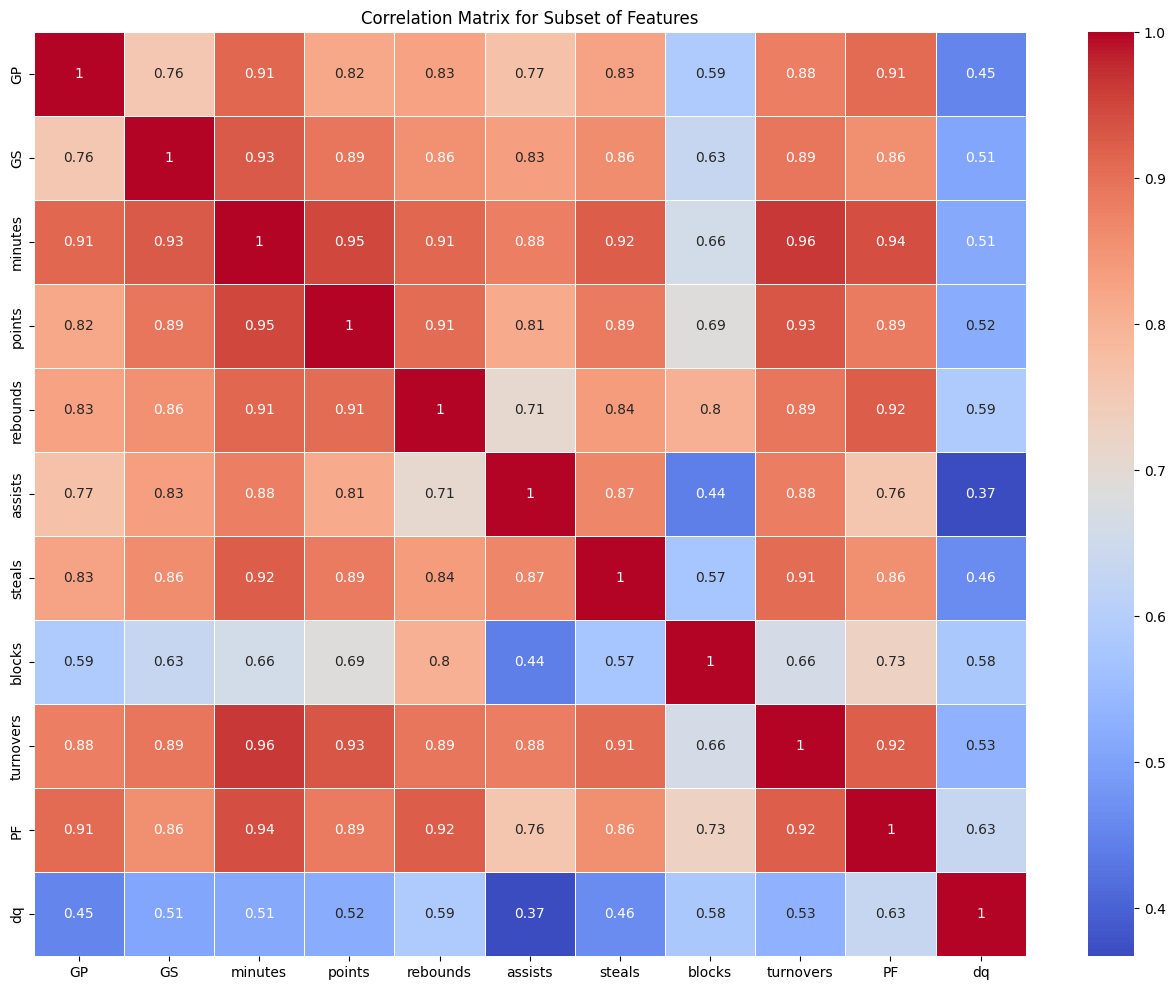

In [81]:
# Select a subset of features
subset_features = ['GP', 'GS', 'minutes',
       'points', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'dq']

# Calculate the correlation matrix for the subset of features
subset_corr_matrix = players_teams[subset_features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Subset of Features')
plt.show()

In [82]:
# GS - game starts and minutes are highly related what do do?
players_teams.drop('GS', axis=1, inplace=True)

In [83]:
teams.head(20)

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore
0,9,ATL,EA,7.0,N,NaN,NaN,NaN,0.396368,0.747586,0.337793,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,0.449867,0.739651,0.342629,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,0.117647,2.0,18.0,141379.0,0.000000,0.176538
1,10,ATL,EA,2.0,Y,L,NaN,NaN,0.448517,0.753642,0.304813,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,0.421498,0.773234,0.341509,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,0.529412,10.0,12.0,120737.0,0.076923,0.219682
2,1,CHA,EA,8.0,N,NaN,NaN,NaN,0.426695,0.746967,0.339378,935.0,551.0,713.0,222.0,496.0,90.0,2186.0,0.455440,0.744413,0.326241,990.0,596.0,596.0,259.0,426.0,123.0,2429.0,0.250000,5.0,16.0,90963.0,0.000000,0.146695
3,2,CHA,EA,4.0,Y,W,W,L,0.419101,0.776515,0.357477,948.0,467.0,605.0,217.0,474.0,114.0,2055.0,0.396533,0.766904,0.308943,911.0,443.0,579.0,257.0,447.0,124.0,2009.0,0.562500,15.0,6.0,105525.0,0.000000,0.200753
4,3,CHA,EA,2.0,Y,L,NaN,NaN,0.430168,0.739065,0.400380,955.0,496.0,647.0,241.0,408.0,105.0,2241.0,0.430548,0.742475,0.357527,915.0,489.0,600.0,208.0,424.0,103.0,2133.0,0.562500,12.0,9.0,106670.0,0.000000,0.178497
5,4,CHA,EA,2.0,Y,L,NaN,NaN,0.418394,0.772881,0.361702,971.0,499.0,697.0,279.0,497.0,115.0,2217.0,0.415352,0.715142,0.339066,1007.0,491.0,606.0,264.0,469.0,104.0,2195.0,0.529412,12.0,12.0,120061.0,0.000000,0.223440
6,5,CHA,EA,5.0,N,NaN,NaN,NaN,0.427179,0.738983,0.361656,872.0,426.0,648.0,210.0,479.0,134.0,2092.0,0.414079,0.746167,0.372493,996.0,516.0,595.0,243.0,437.0,114.0,2168.0,0.470588,8.0,12.0,116383.0,0.000000,0.176760
7,6,CHA,EA,6.0,N,NaN,NaN,NaN,0.403555,0.716346,0.345515,925.0,493.0,727.0,284.0,535.0,113.0,2095.0,0.450742,0.713885,0.365782,1055.0,496.0,654.0,269.0,534.0,146.0,2335.0,0.176471,4.0,16.0,98054.0,0.000000,0.181713
8,7,CHA,EA,6.0,N,NaN,NaN,NaN,0.396694,0.710425,0.323529,1094.0,527.0,734.0,315.0,574.0,155.0,2456.0,0.423918,0.750948,0.333333,1240.0,522.0,707.0,286.0,619.0,125.0,2571.0,0.323529,6.0,14.0,106942.0,0.000000,0.156753
9,7,CHI,EA,7.0,N,NaN,NaN,NaN,0.394483,0.698289,0.292910,1037.0,509.0,674.0,277.0,527.0,125.0,2322.0,0.452259,0.740489,0.373134,1239.0,623.0,584.0,262.0,535.0,120.0,2687.0,0.147059,4.0,16.0,57635.0,0.000000,0.149569


## Exploring post information

### Count number of playoff appearences and wins

In [84]:
# Initialize the 'previous_playoffs' column with zeros
teams['previous_playoffs'] = 0

# Iterate through unique years in teams
for year in teams['year'].unique():
    # Iterate through unique teams in that year
    for team in teams[teams['year'] == year]['tmID'].unique():
        teams.loc[(teams['year'] == year) & (teams['tmID'] == team), 'previous_playoffs'] = teams[(teams['playoff'] == 'Y') & (teams['year'] < year) & (teams['tmID'] == team)].shape[0]



In [85]:
# Initialize the 'previous_playoff_wins' column with zeros
teams['previous_playoff_wins'] = 0

# Iterate through unique years in teams
for year in teams['year'].unique():
    # Iterate through unique teams in that year
    for team in teams[teams['year'] == year]['tmID'].unique():
        teams.loc[(teams['year'] == year) & (teams['tmID'] == team), 'previous_playoff_wins'] = series_post[(series_post['round'] == 'F') & (series_post['year'] < year) & (series_post['tmIDWinner'] == team)].shape[0]

teams[teams['previous_playoff_wins'] > 0]

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins
28,5,DET,EA,3.0,Y,L,NaN,NaN,0.416786,0.702020,0.296651,1170.0,564.0,648.0,277.0,513.0,148.0,2366.0,0.409914,0.771757,0.358349,1055.0,515.0,728.0,289.0,496.0,131.0,2381.0,0.500000,11.0,9.0,160860.0,0.000000,0.188604,1,1
29,6,DET,EA,4.0,Y,L,NaN,NaN,0.403398,0.657623,0.319328,1215.0,474.0,761.0,241.0,571.0,155.0,2247.0,0.403085,0.749337,0.337719,1018.0,473.0,744.0,272.0,520.0,136.0,2287.0,0.470588,11.0,9.0,159356.0,0.000000,0.200081,2,1
30,7,DET,EA,2.0,Y,W,W,W,0.413964,0.741287,0.328502,1286.0,572.0,711.0,213.0,537.0,137.0,2527.0,0.387991,0.753561,0.311943,1084.0,474.0,733.0,275.0,506.0,108.0,2384.0,0.676471,14.0,6.0,159453.0,1.153846,0.154952,3,1
31,8,DET,EA,1.0,Y,W,W,L,0.429898,0.757962,0.357466,1311.0,563.0,702.0,227.0,564.0,117.0,2697.0,0.395668,0.761838,0.332787,1089.0,546.0,767.0,276.0,529.0,117.0,2540.0,0.705882,14.0,6.0,165738.0,0.928571,0.215684,4,2
32,9,DET,EA,1.0,Y,W,W,W,0.424401,0.747312,0.352941,1248.0,604.0,724.0,278.0,496.0,118.0,2672.0,0.405393,0.760811,0.349026,1085.0,520.0,762.0,229.0,572.0,119.0,2522.0,0.647059,16.0,4.0,162669.0,0.368421,0.213937,5,2
33,10,DET,EA,3.0,Y,W,L,NaN,0.430391,0.747573,0.350917,1226.0,575.0,766.0,261.0,546.0,97.0,2652.0,0.409814,0.777368,0.340426,1101.0,524.0,716.0,279.0,531.0,110.0,2644.0,0.529412,11.0,11.0,136069.0,0.000000,0.235985,6,3
35,2,HOU,WE,4.0,Y,L,NaN,NaN,0.391509,0.769944,0.317241,1058.0,426.0,509.0,251.0,436.0,95.0,2047.0,0.392990,0.718254,0.333333,982.0,452.0,561.0,248.0,433.0,120.0,1994.0,0.593750,13.0,8.0,181115.0,0.181818,0.191111,1,1
36,3,HOU,WE,2.0,Y,L,NaN,NaN,0.424634,0.774359,0.328313,1001.0,450.0,467.0,260.0,455.0,126.0,2072.0,0.375000,0.732301,0.308793,973.0,446.0,606.0,262.0,464.0,71.0,1892.0,0.750000,16.0,5.0,188648.0,0.866667,0.177366,2,1
37,4,HOU,WE,2.0,Y,L,NaN,NaN,0.432150,0.788333,0.334302,1030.0,465.0,490.0,231.0,450.0,129.0,2244.0,0.405911,0.725446,0.338000,1006.0,516.0,634.0,227.0,430.0,122.0,2142.0,0.588235,14.0,10.0,150203.0,0.500000,0.202005,3,1
38,5,HOU,WE,6.0,N,NaN,NaN,NaN,0.412830,0.744715,0.343575,1035.0,451.0,555.0,242.0,484.0,107.0,2177.0,0.415339,0.736347,0.350230,1055.0,539.0,655.0,258.0,471.0,129.0,2211.0,0.382353,7.0,15.0,137455.0,0.000000,0.187820,4,1


## Top Coaches

In [86]:
# based on our research there are 2 coaches that are really good: coopemi01w and chancva99w (also whisejo99w performs well on playoffs)
# so it would be good to have a feature representing if the team on that year had this coach
top_coaches = coaches[(coaches.coachID == 'coopemi01w') | (coaches.coachID == 'chancva99w') | (coaches.coachID == 'whisejo99w')][['tmID', 'year']]

teams['top_coaches'] = teams.apply(lambda row: 1 if (row['tmID'], row['year']) in set(zip(top_coaches['tmID'], top_coaches['year'])) else 0, axis=1)

teams[(teams.tmID == 'HOU') | (teams.tmID == 'ATL')] # print purposes
#final_zeros[(final_zeros.tmID == 'HOU') | (final_zeros.tmID == 'ATL')] # print purposes

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches
0,9,ATL,EA,7.0,N,NaN,NaN,NaN,0.396368,0.747586,0.337793,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,0.449867,0.739651,0.342629,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,0.117647,2.0,18.0,141379.0,0.000000,0.176538,0,0,0
1,10,ATL,EA,2.0,Y,L,NaN,NaN,0.448517,0.753642,0.304813,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,0.421498,0.773234,0.341509,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,0.529412,10.0,12.0,120737.0,0.076923,0.219682,0,0,0
34,1,HOU,WE,2.0,Y,W,W,W,0.470433,0.821767,0.350305,997.0,494.0,554.0,284.0,440.0,104.0,2475.0,0.405573,0.728346,0.296651,902.0,473.0,648.0,233.0,480.0,85.0,2066.0,0.843750,17.0,4.0,196077.0,2.307692,0.146695,0,0,1
35,2,HOU,WE,4.0,Y,L,NaN,NaN,0.391509,0.769944,0.317241,1058.0,426.0,509.0,251.0,436.0,95.0,2047.0,0.392990,0.718254,0.333333,982.0,452.0,561.0,248.0,433.0,120.0,1994.0,0.593750,13.0,8.0,181115.0,0.181818,0.191111,1,1,1
36,3,HOU,WE,2.0,Y,L,NaN,NaN,0.424634,0.774359,0.328313,1001.0,450.0,467.0,260.0,455.0,126.0,2072.0,0.375000,0.732301,0.308793,973.0,446.0,606.0,262.0,464.0,71.0,1892.0,0.750000,16.0,5.0,188648.0,0.866667,0.177366,2,1,1
37,4,HOU,WE,2.0,Y,L,NaN,NaN,0.432150,0.788333,0.334302,1030.0,465.0,490.0,231.0,450.0,129.0,2244.0,0.405911,0.725446,0.338000,1006.0,516.0,634.0,227.0,430.0,122.0,2142.0,0.588235,14.0,10.0,150203.0,0.500000,0.202005,3,1,1
38,5,HOU,WE,6.0,N,NaN,NaN,NaN,0.412830,0.744715,0.343575,1035.0,451.0,555.0,242.0,484.0,107.0,2177.0,0.415339,0.736347,0.350230,1055.0,539.0,655.0,258.0,471.0,129.0,2211.0,0.382353,7.0,15.0,137455.0,0.000000,0.187820,4,1,1
39,6,HOU,WE,3.0,Y,W,L,NaN,0.447917,0.763768,0.302439,960.0,467.0,581.0,246.0,425.0,105.0,2309.0,0.436214,0.749553,0.349882,961.0,541.0,685.0,197.0,481.0,111.0,2263.0,0.558824,11.0,11.0,120676.0,1.266667,0.200517,4,1,1
40,7,HOU,WE,3.0,Y,L,NaN,NaN,0.442326,0.710914,0.358051,1125.0,532.0,617.0,252.0,566.0,84.0,2507.0,0.415771,0.723577,0.298387,1124.0,526.0,705.0,298.0,519.0,89.0,2449.0,0.529412,11.0,9.0,130586.0,1.714286,0.196794,5,1,1
41,8,HOU,WE,5.0,N,NaN,NaN,NaN,0.425779,0.768377,0.345205,1144.0,558.0,655.0,289.0,633.0,109.0,2510.0,0.421918,0.803894,0.347676,1063.0,588.0,677.0,310.0,568.0,160.0,2628.0,0.382353,10.0,12.0,138816.0,0.000000,0.220056,6,1,0


## Remove data leakage

In [87]:
teams.drop(['firstRound','semis', 'finals'], inplace=True, axis=1)

## Sliding Window

In [88]:
teams.columns

Index(['year', 'tmID', 'confID', 'rank', 'playoff', 'o_fga', 'o_fta', 'o_3pa',
       'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fga',
       'd_fta', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk',
       'd_pts', 'winRatio', 'confW', 'confL', 'attend', 'teamYearAwardPoints',
       'teamYearOverallScore', 'previous_playoffs', 'previous_playoff_wins',
       'top_coaches'],
      dtype='object')

In [89]:
# Adding unexistent pairs (tmID, year)
# Create a DataFrame with all combinations of 'tmID' and 'year' in the desired range
all_tmID = teams['tmID'].unique()
all_years = range(1, NUM_SEASONS + 1)
all_combinations = pd.MultiIndex.from_product([all_tmID, all_years], names=['tmID', 'year'])
all_tmID_years = pd.DataFrame(index=all_combinations).reset_index()


# Merge the original DataFrame with the newly created DataFrame
merged_df = pd.merge(all_tmID_years, teams, on=['tmID', 'year'], how='left')

# Fill missing values with 0 for numeric columns (except 'year' and 'tmID')
merged_df.update(merged_df.select_dtypes('number').fillna(0))

# Fill missing values for non-numeric columns with appropriate defaults
# For example, assuming 'playoff' and other columns are string columns:
merged_df.update(merged_df.select_dtypes(exclude='number'))

# Sort the DataFrame by 'tmID' and 'year' if needed
merged_df.sort_values(by=['tmID', 'year'], inplace=True)

# Now, merged_df contains rows for all 'tmID' and 'year' combinations from 1 to 10
# Missing numeric values are filled with 0, and missing non-numeric values are filled with 'NaN'

merged_df.head(20)

,tmID,year,confID,rank,playoff,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches
0,ATL,1,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,ATL,2,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,ATL,3,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,ATL,4,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,ATL,5,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
5,ATL,6,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
6,ATL,7,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,ATL,8,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
8,ATL,9,EA,7.0,N,0.396368,0.747586,0.337793,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,0.449867,0.739651,0.342629,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,0.117647,2.0,18.0,141379.0,0.000000,0.176538,0.0,0.0,0.0
9,ATL,10,EA,2.0,Y,0.448517,0.753642,0.304813,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,0.421498,0.773234,0.341509,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,0.529412,10.0,12.0,120737.0,0.076923,0.219682,0.0,0.0,0.0


In [90]:
# add pairs of (tmID, year) that do not existed before
# necessary for computing information based on previous years
unique_pairs = teams.groupby(['tmID', 'confID']).size().reset_index().rename(columns={0: 'count'})

merged_df['confID'].fillna(merged_df['tmID'].map(unique_pairs.set_index('tmID')['confID']), inplace=True)
merged_df['playoff'].fillna('N', inplace=True)

In [91]:
# add a feature to help model distinguish if in a given season, a team was present or not
merged_df['wasPresent'] = (merged_df['o_fga'] != 0).astype(int)
merged_df[['tmID', 'year', 'rank', 'wasPresent']].head(10)

,tmID,year,rank,wasPresent
0,ATL,1,0.0,0
1,ATL,2,0.0,0
2,ATL,3,0.0,0
3,ATL,4,0.0,0
4,ATL,5,0.0,0
5,ATL,6,0.0,0
6,ATL,7,0.0,0
7,ATL,8,0.0,0
8,ATL,9,7.0,1
9,ATL,10,2.0,1


In [92]:
merged_df_zeros = merged_df.copy()
merged_df.head(20)

,tmID,year,confID,rank,playoff,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,wasPresent
0,ATL,1,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
1,ATL,2,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
2,ATL,3,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
3,ATL,4,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
4,ATL,5,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
5,ATL,6,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
6,ATL,7,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
7,ATL,8,EA,0.0,N,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
8,ATL,9,EA,7.0,N,0.396368,0.747586,0.337793,1077.0,492.0,796.0,285.0,593.0,142.0,2534.0,0.449867,0.739651,0.342629,1265.0,684.0,726.0,310.0,561.0,134.0,2879.0,0.117647,2.0,18.0,141379.0,0.000000,0.176538,0.0,0.0,0.0,1
9,ATL,10,EA,2.0,Y,0.448517,0.753642,0.304813,1259.0,547.0,741.0,329.0,590.0,121.0,2861.0,0.421498,0.773234,0.341509,1174.0,615.0,700.0,347.0,601.0,133.0,2797.0,0.529412,10.0,12.0,120737.0,0.076923,0.219682,0.0,0.0,0.0,1


In [93]:
# we decided that a team that is not present in the championship would be expected to have stats similar to the teams of the 
# championship on the 1st quartil (the worst 25 %)
attributes_to_update = ['o_fga', 'o_fta', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fga', 'd_fta', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'winRatio', 'confW', 'confL', 'attend']

# Step 1: Create a DataFrame with minimum values for each attribute by 'year'
min_values_by_year = teams.groupby('year')[attributes_to_update].quantile(0.25).reset_index()
min_values_by_year.rename(columns={attr: f'min_{attr}' for attr in attributes_to_update}, inplace=True)

# Step 2: Merge the minimum values DataFrame with the 'merged_df'
merged_df = merged_df.merge(min_values_by_year, on='year', how='left')

# Step 3: Update the attributes in 'merged_df' where the initial value is 0
for attr in attributes_to_update:
    merged_df[attr] = merged_df.apply(lambda row: row[attr] if row[attr] != 0 else row[f'min_{attr}'], axis=1)
min_rank = teams['rank'].max() + 1
merged_df['rank'] = merged_df.apply(lambda row: row['rank'] if row['rank'] != 0 else min_rank, axis=1)
merged_df_zeros['rank'] = merged_df_zeros.apply(lambda row: row['rank'] if row['rank'] != 0 else min_rank, axis=1) # zeros dataset also needs this

# Step 4: Drop the added columns containing the minimum values
merged_df.drop(columns=[f'min_{attr}' for attr in attributes_to_update], inplace=True)
merged_df.head(10)

,tmID,year,confID,rank,playoff,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,wasPresent
0,ATL,1,EA,9.0,N,0.425155,0.699416,0.313383,930.25,476.0,612.00,245.75,472.00,90.75,2170.75,0.422859,0.731232,0.318644,920.00,472.75,616.50,240.50,478.25,94.75,2117.00,0.382812,6.50,8.00,114300.75,0.000000,0.000000,0.0,0.0,0.0,0
1,ATL,2,EA,9.0,N,0.390538,0.732112,0.317036,942.75,447.5,597.00,237.75,442.50,103.25,2036.25,0.393465,0.718189,0.314646,967.50,441.75,585.75,244.50,453.75,112.75,2038.25,0.335938,7.00,7.75,116782.25,0.000000,0.000000,0.0,0.0,0.0,0
2,ATL,3,EA,9.0,N,0.409082,0.726472,0.321280,940.50,462.0,602.50,227.50,454.00,99.00,2084.75,0.412701,0.734348,0.328344,952.25,460.25,599.25,231.75,443.75,103.75,2103.75,0.414062,7.75,9.00,117499.25,0.000000,0.000000,0.0,0.0,0.0,0
3,ATL,4,EA,9.0,N,0.409594,0.721270,0.318836,1007.50,503.5,635.25,231.25,462.75,111.00,2232.50,0.406895,0.729033,0.319517,1006.25,506.75,618.25,230.50,467.25,107.75,2226.00,0.470588,11.00,10.25,122091.00,0.000000,0.000000,0.0,0.0,0.0,0
4,ATL,5,EA,9.0,N,0.416786,0.720199,0.326568,1004.00,493.0,628.00,255.00,479.00,118.00,2191.00,0.413645,0.736347,0.343529,996.00,513.00,624.00,241.00,471.00,114.00,2235.00,0.470588,8.00,9.00,128989.00,0.000000,0.000000,0.0,0.0,0.0,0
5,ATL,6,EA,9.0,N,0.411614,0.716346,0.320513,960.00,493.0,624.00,236.00,462.00,105.00,2211.00,0.412390,0.726974,0.317422,1018.00,473.00,654.00,235.00,442.00,111.00,2263.00,0.470588,9.00,9.00,121944.00,0.000000,0.000000,0.0,0.0,0.0,0
6,ATL,7,EA,9.0,N,0.406119,0.717002,0.324773,1095.50,509.0,626.25,247.50,527.25,97.75,2468.75,0.417779,0.739700,0.314174,1066.25,511.00,642.25,255.25,485.25,105.75,2425.00,0.338235,7.25,8.00,123513.25,0.000000,0.000000,0.0,0.0,0.0,0
7,ATL,8,EA,9.0,N,0.407809,0.767785,0.341912,1139.00,533.0,641.00,245.00,540.00,109.00,2517.00,0.413855,0.761250,0.332787,1094.00,542.00,633.00,256.00,529.00,112.00,2501.00,0.411765,8.00,9.00,131524.00,0.000000,0.000000,0.0,0.0,0.0,0
8,ATL,9,EA,7.0,N,0.396368,0.747586,0.337793,1077.00,492.0,796.00,285.00,593.00,142.00,2534.00,0.449867,0.739651,0.342629,1265.00,684.00,726.00,310.00,561.00,134.00,2879.00,0.117647,2.00,18.00,141379.00,0.000000,0.176538,0.0,0.0,0.0,1
9,ATL,10,EA,2.0,Y,0.448517,0.753642,0.304813,1259.00,547.0,741.00,329.00,590.00,121.00,2861.00,0.421498,0.773234,0.341509,1174.00,615.00,700.00,347.00,601.00,133.00,2797.00,0.529412,10.00,12.00,120737.00,0.076923,0.219682,0.0,0.0,0.0,1


In [94]:
# Calculate the first quartile (25th percentile) of overallScoreYear for each year, considering only players with minutes > 0
first_quartile_by_year = merged_df.query('teamYearOverallScore > 0').groupby('year')['teamYearOverallScore'].quantile(0.25).reset_index()
first_quartile_by_year.rename(columns={'teamYearOverallScore': 'first_quartile'}, inplace=True)

# Merge the first quartile values with the 'merged_df'
merged_df = merged_df.merge(first_quartile_by_year, on='year', how='left')

# Update the 'overallScoreYear' values where the initial value is 0 with the first quartile value
merged_df['teamYearOverallScore'] = np.where(merged_df['teamYearOverallScore'] == 0, merged_df['first_quartile'], merged_df['teamYearOverallScore'])

# Calculate the mean of first quartiles for all years except year 1
mean_first_quartile = first_quartile_by_year.query('year > 1')['first_quartile'].mean()

# Update the 'overallScoreYear' values for year 1 with the mean of first quartiles
merged_df.loc[merged_df['year'] == 1, 'teamYearOverallScore'] = mean_first_quartile

# Drop the added column 'first_quartile'
merged_df.drop(columns=['first_quartile'], inplace=True)

pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display as None
first_quartile_by_year.head(20)  # Display the first 25 rows with all columns
merged_df_zeros['teamYearOverallScore'] = merged_df['teamYearOverallScore']

merged_df.head(20)

,tmID,year,confID,rank,playoff,o_fga,o_fta,o_3pa,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fga,d_fta,d_3pa,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,winRatio,confW,confL,attend,teamYearAwardPoints,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,wasPresent
0,ATL,1,EA,9.0,N,0.425155,0.699416,0.313383,930.25,476.0,612.00,245.75,472.00,90.75,2170.75,0.422859,0.731232,0.318644,920.00,472.75,616.50,240.50,478.25,94.75,2117.00,0.382812,6.50,8.00,114300.75,0.000000,0.188697,0.0,0.0,0.0,0
1,ATL,2,EA,9.0,N,0.390538,0.732112,0.317036,942.75,447.5,597.00,237.75,442.50,103.25,2036.25,0.393465,0.718189,0.314646,967.50,441.75,585.75,244.50,453.75,112.75,2038.25,0.335938,7.00,7.75,116782.25,0.000000,0.172784,0.0,0.0,0.0,0
2,ATL,3,EA,9.0,N,0.409082,0.726472,0.321280,940.50,462.0,602.50,227.50,454.00,99.00,2084.75,0.412701,0.734348,0.328344,952.25,460.25,599.25,231.75,443.75,103.75,2103.75,0.414062,7.75,9.00,117499.25,0.000000,0.175230,0.0,0.0,0.0,0
3,ATL,4,EA,9.0,N,0.409594,0.721270,0.318836,1007.50,503.5,635.25,231.25,462.75,111.00,2232.50,0.406895,0.729033,0.319517,1006.25,506.75,618.25,230.50,467.25,107.75,2226.00,0.470588,11.00,10.25,122091.00,0.000000,0.180568,0.0,0.0,0.0,0
4,ATL,5,EA,9.0,N,0.416786,0.720199,0.326568,1004.00,493.0,628.00,255.00,479.00,118.00,2191.00,0.413645,0.736347,0.343529,996.00,513.00,624.00,241.00,471.00,114.00,2235.00,0.470588,8.00,9.00,128989.00,0.000000,0.187096,0.0,0.0,0.0,0
5,ATL,6,EA,9.0,N,0.411614,0.716346,0.320513,960.00,493.0,624.00,236.00,462.00,105.00,2211.00,0.412390,0.726974,0.317422,1018.00,473.00,654.00,235.00,442.00,111.00,2263.00,0.470588,9.00,9.00,121944.00,0.000000,0.179109,0.0,0.0,0.0,0
6,ATL,7,EA,9.0,N,0.406119,0.717002,0.324773,1095.50,509.0,626.25,247.50,527.25,97.75,2468.75,0.417779,0.739700,0.314174,1066.25,511.00,642.25,255.25,485.25,105.75,2425.00,0.338235,7.25,8.00,123513.25,0.000000,0.157290,0.0,0.0,0.0,0
7,ATL,8,EA,9.0,N,0.407809,0.767785,0.341912,1139.00,533.0,641.00,245.00,540.00,109.00,2517.00,0.413855,0.761250,0.332787,1094.00,542.00,633.00,256.00,529.00,112.00,2501.00,0.411765,8.00,9.00,131524.00,0.000000,0.213199,0.0,0.0,0.0,0
8,ATL,9,EA,7.0,N,0.396368,0.747586,0.337793,1077.00,492.0,796.00,285.00,593.00,142.00,2534.00,0.449867,0.739651,0.342629,1265.00,684.00,726.00,310.00,561.00,134.00,2879.00,0.117647,2.00,18.00,141379.00,0.000000,0.176538,0.0,0.0,0.0,1
9,ATL,10,EA,2.0,Y,0.448517,0.753642,0.304813,1259.00,547.0,741.00,329.00,590.00,121.00,2861.00,0.421498,0.773234,0.341509,1174.00,615.00,700.00,347.00,601.00,133.00,2797.00,0.529412,10.00,12.00,120737.00,0.076923,0.219682,0.0,0.0,0.0,1


In [95]:
# Update rank with the information from last season
to_keep_attributes =['tmID', 'year', 'wasPresent', 'confID', 'playoff', 'teamYearOverallScore', 'previous_playoffs', 'previous_playoff_wins', 'top_coaches']
final = merged_df[to_keep_attributes]
final_zeros = merged_df_zeros[to_keep_attributes]

In [96]:
WIN_SIZE = 2

# Weights to make a logarithic value based on sliding window
weights_log = [1 / (2 ** n) for n in range(1, WIN_SIZE + 1)]
weights_mean = [1 for  n in range(1, WIN_SIZE + 1)]

# Attributes to be computed based on sliding window
attributes = ['rank', 'o_fga', 'o_fta', 'o_3pa', 'd_fga', 'd_fta', 'd_3pa',
            'winRatio', 'teamYearAwardPoints', 'confW', 'confL', 'attend']

db_read = [merged_df, merged_df_zeros]
db_update = [final, final_zeros]

for idx in range(0, len(db_read)):
    # updating stats using values from last 2 seasons
    for year in range(NUM_SEASONS, WIN_SIZE, -1):
        # Filter the DataFrame for the current year and the next year
        current_year = db_read[idx][db_read[idx]['year'] == year]
        window_years = db_read[idx][(db_read[idx]['year'] < year) & (db_read[idx]['year'] >= year - WIN_SIZE)]

        # Iterate through each row in the current year's DataFrame
        for index, row in current_year.iterrows():
            # Get the team ID for the current row
            team_id = row['tmID']

            # Find the corresponding row in the window year's DataFrame for the same team
            window_slide = window_years[window_years['tmID'] == team_id]
            window_slide = window_slide.sort_values(by='year', ascending=False)
            if len(window_slide) == WIN_SIZE: # sanity check - it must be always true

                for attribute in attributes:
                    value_list = window_slide[attribute].tolist()
                    db_update[idx].at[index, attribute] = sum([x * y for x, y in zip(value_list, weights_mean)]) / WIN_SIZE
final.head(20)
#final_zeros.head(20)

/var/folders/5q/z4hwwtk50yngsdv9lm9d3nmm0000gn/T/ipykernel_58815/2733314324.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_update[idx].at[index, attribute] = sum([x * y for x, y in zip(value_list, weights_mean)]) / WIN_SIZE
/var/folders/5q/z4hwwtk50yngsdv9lm9d3nmm0000gn/T/ipykernel_58815/2733314324.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_update[idx].at[index, attribute] = sum([x * y for x, y in zip(value_list, weights_mean)]) / WIN_SIZE
/var/folders/5q/z4hwwtk50yngsdv9lm9d3nmm0000gn

,tmID,year,wasPresent,confID,playoff,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,rank,o_fga,o_fta,o_3pa,d_fga,d_fta,d_3pa,winRatio,teamYearAwardPoints,confW,confL,attend
0,ATL,1,0,EA,N,0.188697,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ATL,2,0,EA,N,0.172784,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATL,3,0,EA,N,0.175230,0.0,0.0,0.0,9.0,0.407847,0.715764,0.315209,0.408162,0.724710,0.316645,0.359375,0.000000,6.750,7.875,115541.500
3,ATL,4,0,EA,N,0.180568,0.0,0.0,0.0,9.0,0.399810,0.729292,0.319158,0.403083,0.726268,0.321495,0.375000,0.000000,7.375,8.375,117140.750
4,ATL,5,0,EA,N,0.187096,0.0,0.0,0.0,9.0,0.409338,0.723871,0.320058,0.409798,0.731690,0.323931,0.442325,0.000000,9.375,9.625,119795.125
5,ATL,6,0,EA,N,0.179109,0.0,0.0,0.0,9.0,0.413190,0.720734,0.322702,0.410270,0.732690,0.331523,0.470588,0.000000,9.500,9.625,125540.000
6,ATL,7,0,EA,N,0.157290,0.0,0.0,0.0,9.0,0.414200,0.718272,0.323541,0.413018,0.731660,0.330476,0.470588,0.000000,8.500,9.000,125466.500
7,ATL,8,0,EA,N,0.213199,0.0,0.0,0.0,9.0,0.408867,0.716674,0.322643,0.415085,0.733337,0.315798,0.404412,0.000000,8.125,8.500,122728.625
8,ATL,9,1,EA,N,0.176538,0.0,0.0,0.0,9.0,0.406964,0.742394,0.333342,0.415817,0.750475,0.323480,0.375000,0.000000,7.625,8.500,127518.625
9,ATL,10,1,EA,Y,0.219682,0.0,0.0,0.0,8.0,0.402089,0.757686,0.339852,0.431861,0.750451,0.337708,0.264706,0.000000,5.000,13.500,136451.500


## Filter out years where the team didn't play

In [97]:
final = final[final['wasPresent'] == 1]
final_zeros = final_zeros[final_zeros['wasPresent'] == 1]

## Mean height

In [98]:
# height is extremly important in NBA so a feature indicating the mean heights of the squad was added
height_df = players[['bioID', 'height']]

# Create a function to map heights based on 'playerID'
def get_height(playerID):
    height_match = height_df[height_df['bioID'] == playerID]
    if not height_match.empty:
        return height_match['height'].iloc[0]
    return None  # Handle missing heights as needed

# merge heights in players_teams dataset
players_teams['height'] = players_teams['playerID'].apply(get_height)

In [99]:
# create auxiliar dataset containing the tmID, year, and the mean_height
mean_height_df = players_teams.groupby(['tmID', 'year']).agg({'height': 'mean'}).reset_index()

# Rename the 'height' column to 'mean_height'
mean_height_df = mean_height_df.rename(columns={'height': 'mean_height'})

In [100]:
# joining the mean_height into final dataset: Note that here we don't use values from last seasons. 
# we already know the players at the beginning of the season
final = final.merge(mean_height_df, on=['tmID', 'year'], how='left')
final_zeros = final_zeros.merge(mean_height_df, on=['tmID', 'year'], how='left')

final.head(20)


,tmID,year,wasPresent,confID,playoff,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,rank,o_fga,o_fta,o_3pa,d_fga,d_fta,d_3pa,winRatio,teamYearAwardPoints,confW,confL,attend,mean_height
0,ATL,9,1,EA,N,0.176538,0.0,0.0,0.0,9.0,0.406964,0.742394,0.333342,0.415817,0.750475,0.323480,0.375000,0.000000,7.625,8.500,127518.625,73.214286
1,ATL,10,1,EA,Y,0.219682,0.0,0.0,0.0,8.0,0.402089,0.757686,0.339852,0.431861,0.750451,0.337708,0.264706,0.000000,5.000,13.500,136451.500,72.538462
2,ATL,11,1,EA,-1,0.251448,1.0,0.0,0.0,4.5,0.422443,0.750614,0.321303,0.435682,0.756443,0.342069,0.323529,0.038462,6.000,15.000,131058.000,72.916667
3,CHA,1,1,EA,N,0.188697,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.692308
4,CHA,2,1,EA,Y,0.200753,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.500000
5,CHA,3,1,EA,Y,0.178497,1.0,0.0,0.0,6.0,0.422898,0.761741,0.348427,0.425987,0.755659,0.317592,0.406250,0.000000,10.000,11.000,98244.000,71.307692
6,CHA,4,1,EA,Y,0.223440,2.0,0.0,0.0,3.0,0.424634,0.757790,0.378928,0.413540,0.754689,0.333235,0.562500,0.000000,13.500,7.500,106097.500,71.181818
7,CHA,5,1,EA,N,0.176760,3.0,0.0,0.0,2.0,0.424281,0.755973,0.381041,0.422950,0.728809,0.348297,0.545956,0.000000,12.000,10.500,113365.500,72.000000
8,CHA,6,1,EA,N,0.181713,3.0,0.0,0.0,3.5,0.422787,0.755932,0.361679,0.414715,0.730655,0.355780,0.500000,0.000000,10.000,12.000,118222.000,72.062500
9,CHA,7,1,EA,N,0.156753,3.0,0.0,0.0,5.5,0.415367,0.727665,0.353585,0.432410,0.730026,0.369137,0.323529,0.000000,6.000,14.000,107218.500,72.916667


## Remove the first WIN_SIZE seasons

In [101]:
final = final[final['year'] > WIN_SIZE]
final_zeros = final_zeros[final_zeros['year'] > WIN_SIZE]

final.drop('wasPresent', axis=1, inplace=True)
final_zeros.drop('wasPresent', axis=1, inplace=True)

## Saving information

In [102]:
final.to_csv('teams_final.csv', index=False)
final_zeros.to_csv('teams_final_zeros.csv', index=False)

In [103]:
final.head(20)

,tmID,year,confID,playoff,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,rank,o_fga,o_fta,o_3pa,d_fga,d_fta,d_3pa,winRatio,teamYearAwardPoints,confW,confL,attend,mean_height
0,ATL,9,EA,N,0.176538,0.0,0.0,0.0,9.0,0.406964,0.742394,0.333342,0.415817,0.750475,0.323480,0.375000,0.000000,7.625,8.500,127518.625,73.214286
1,ATL,10,EA,Y,0.219682,0.0,0.0,0.0,8.0,0.402089,0.757686,0.339852,0.431861,0.750451,0.337708,0.264706,0.000000,5.000,13.500,136451.500,72.538462
2,ATL,11,EA,-1,0.251448,1.0,0.0,0.0,4.5,0.422443,0.750614,0.321303,0.435682,0.756443,0.342069,0.323529,0.038462,6.000,15.000,131058.000,72.916667
5,CHA,3,EA,Y,0.178497,1.0,0.0,0.0,6.0,0.422898,0.761741,0.348427,0.425987,0.755659,0.317592,0.406250,0.000000,10.000,11.000,98244.000,71.307692
6,CHA,4,EA,Y,0.223440,2.0,0.0,0.0,3.0,0.424634,0.757790,0.378928,0.413540,0.754689,0.333235,0.562500,0.000000,13.500,7.500,106097.500,71.181818
7,CHA,5,EA,N,0.176760,3.0,0.0,0.0,2.0,0.424281,0.755973,0.381041,0.422950,0.728809,0.348297,0.545956,0.000000,12.000,10.500,113365.500,72.000000
8,CHA,6,EA,N,0.181713,3.0,0.0,0.0,3.5,0.422787,0.755932,0.361679,0.414715,0.730655,0.355780,0.500000,0.000000,10.000,12.000,118222.000,72.062500
9,CHA,7,EA,N,0.156753,3.0,0.0,0.0,5.5,0.415367,0.727665,0.353585,0.432410,0.730026,0.369137,0.323529,0.000000,6.000,14.000,107218.500,72.916667
10,CHI,7,EA,N,0.149569,0.0,0.0,0.0,9.0,0.414200,0.718272,0.323541,0.413018,0.731660,0.330476,0.470588,0.000000,8.500,9.000,125466.500,72.400000
11,CHI,8,EA,N,0.193660,0.0,0.0,0.0,8.0,0.403048,0.707318,0.306712,0.432325,0.733731,0.345278,0.308824,0.000000,6.500,12.500,89789.500,71.500000


In [104]:
final_zeros.head(20)

,tmID,year,confID,playoff,teamYearOverallScore,previous_playoffs,previous_playoff_wins,top_coaches,rank,o_fga,o_fta,o_3pa,d_fga,d_fta,d_3pa,winRatio,teamYearAwardPoints,confW,confL,attend,mean_height
0,ATL,9,EA,N,0.176538,0.0,0.0,0.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.214286
1,ATL,10,EA,Y,0.219682,0.0,0.0,0.0,8.0,0.198184,0.373793,0.168896,0.224933,0.369826,0.171315,0.058824,0.000000,1.0,9.0,70689.5,72.538462
2,ATL,11,EA,-1,0.251448,1.0,0.0,0.0,4.5,0.422443,0.750614,0.321303,0.435682,0.756443,0.342069,0.323529,0.038462,6.0,15.0,131058.0,72.916667
5,CHA,3,EA,Y,0.178497,1.0,0.0,0.0,6.0,0.422898,0.761741,0.348427,0.425987,0.755659,0.317592,0.406250,0.000000,10.0,11.0,98244.0,71.307692
6,CHA,4,EA,Y,0.223440,2.0,0.0,0.0,3.0,0.424634,0.757790,0.378928,0.413540,0.754689,0.333235,0.562500,0.000000,13.5,7.5,106097.5,71.181818
7,CHA,5,EA,N,0.176760,3.0,0.0,0.0,2.0,0.424281,0.755973,0.381041,0.422950,0.728809,0.348297,0.545956,0.000000,12.0,10.5,113365.5,72.000000
8,CHA,6,EA,N,0.181713,3.0,0.0,0.0,3.5,0.422787,0.755932,0.361679,0.414715,0.730655,0.355780,0.500000,0.000000,10.0,12.0,118222.0,72.062500
9,CHA,7,EA,N,0.156753,3.0,0.0,0.0,5.5,0.415367,0.727665,0.353585,0.432410,0.730026,0.369137,0.323529,0.000000,6.0,14.0,107218.5,72.916667
10,CHI,7,EA,N,0.149569,0.0,0.0,0.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,72.400000
11,CHI,8,EA,N,0.193660,0.0,0.0,0.0,8.0,0.197241,0.349145,0.146455,0.226129,0.370245,0.186567,0.073529,0.000000,2.0,8.0,28817.5,71.500000
